In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm

sns.set_palette("colorblind")
colorblind = sns.color_palette("colorblind")
deep = sns.color_palette("deep")

import matplotlib.font_manager as fm

# Add Avenir to the font list - try both common Avenir font names
plt.rcParams["font.family"] = ["Avenir", "Avenir Next"]     
plt.rcParams["font.size"] = 22             
plt.rcParams["figure.facecolor"] = "white" 
plt.rcParams["axes.facecolor"] = "white"

plt.rcParams["font.family"] = ""     
plt.rcParams["font.size"] = 22             
plt.rcParams["figure.facecolor"] = "white" 
plt.rcParams["axes.facecolor"] = "white" 

In [2]:
%matplotlib inline

In [3]:
df_qwen = pd.read_csv('../results/qwen_results.csv')
df_llama = pd.read_csv('../results/llama_results.csv')

df_qwen = df_qwen.sort_values(by="step")
df_llama = df_llama.sort_values(by="step")

# Behavioral Eval of JUST online RL

In [4]:
markers = [
    'o',        # circle
    r'$\clubsuit$',  # club symbol
    r'$\heartsuit$', # heart symbol
    r'$\star$',     # star
    r'$\oplus$',    # circled plus
    r'$\otimes$',   # circled times
    r'$\diamondsuit$', # diamond symbol
    r'$\circledcirc$', # double circle
    r'$\triangle$',    # triangle
    r'$\square$',      # square
    r'$\infty$',       # infinity symbol
    r'$\spadesuit$'    # spade symbol
]
qwen_marker = markers[0]
llama_marker = markers[3]
qwen_color = "#ae8ff2"
llama_color = "#8fbff2"

In [5]:
df_qwen_base = df_qwen[df_qwen["condition"] == "base_ppo"].sort_values("step")
df_llama_base = df_llama[df_llama["condition"] == "base_ppo"].sort_values("step")

In [6]:
# print the keys of df_qwen_base
print(df_qwen_base.keys())

Index(['condition', 'step', 'avg_verifications', 'avg_backtracking',
       'avg_subgoals', 'avg_backwards', 'total_verifications',
       'total_backtracking', 'total_subgoals', 'total_backwards', 'accuracy',
       'response_length'],
      dtype='object')


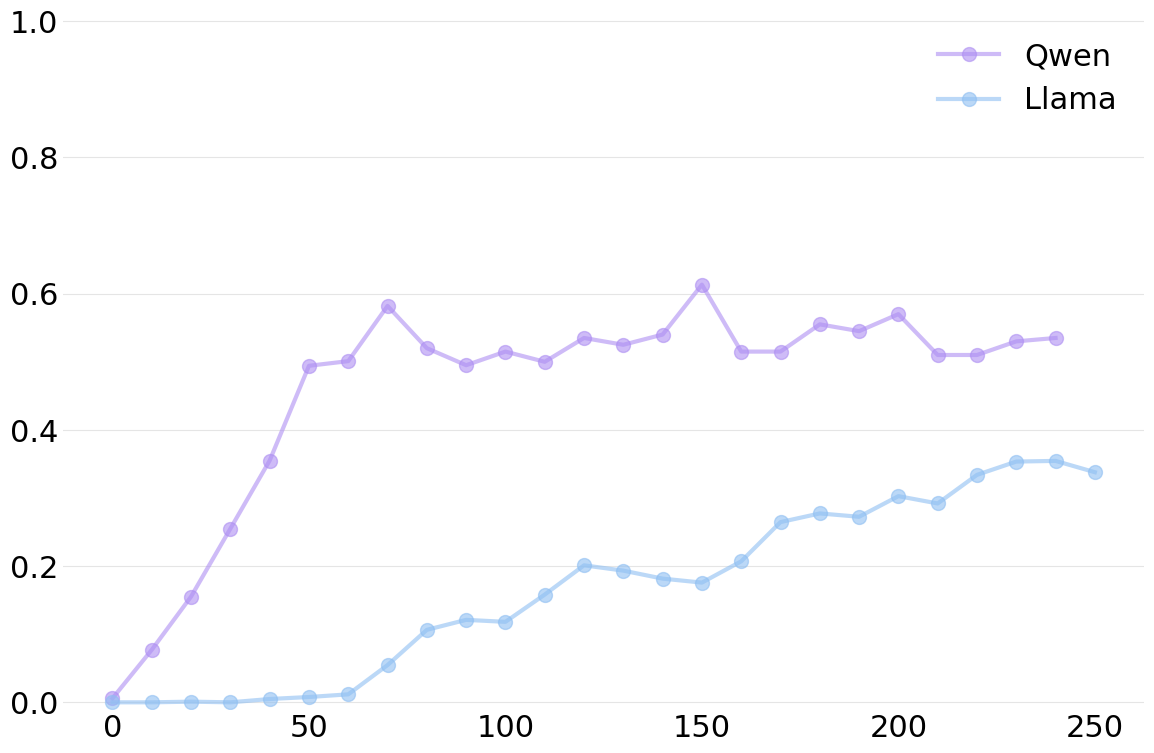

In [7]:
# plot accuracy for qwen and llama
phenomena = ['accuracy']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 1.01)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_qwen_base["step"], df_qwen_base["accuracy"], marker=qwen_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_base["step"], df_llama_base["accuracy"], marker=qwen_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)

# add legend
ax.legend(["Qwen", "Llama"], frameon=False)

plt.tight_layout()
# save the plot
plt.savefig("accuracy_qwen_llama_base.png", dpi=300)
plt.show()

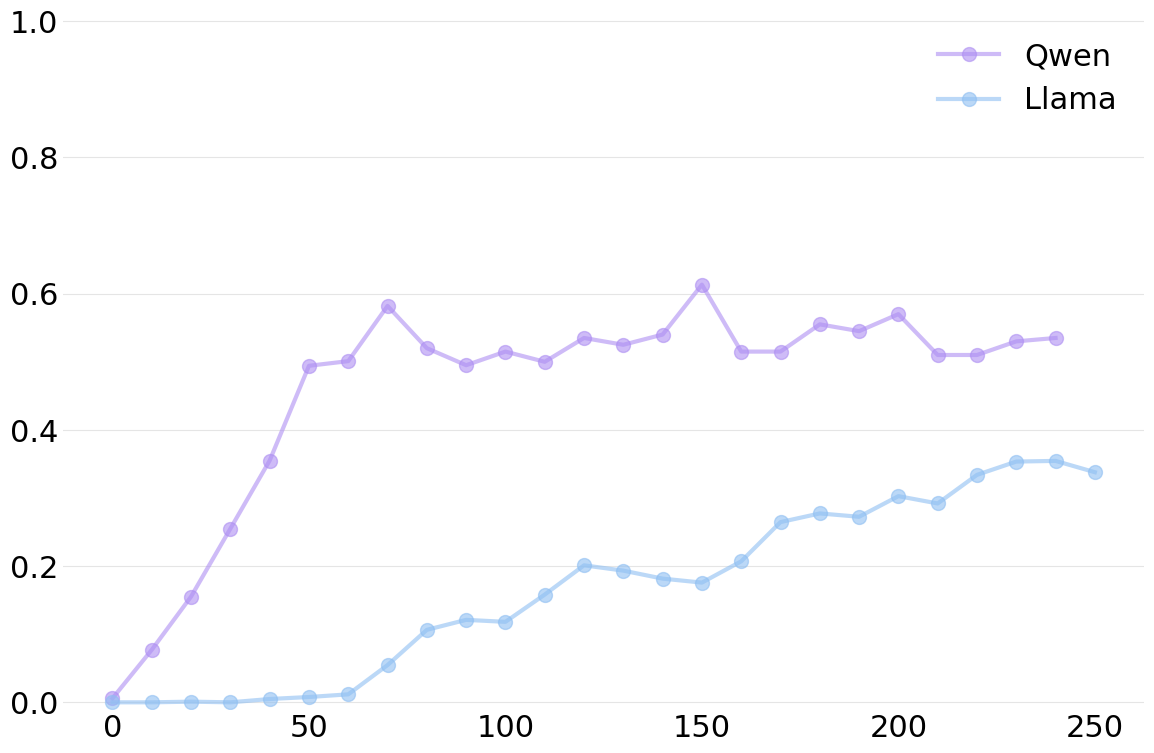

In [8]:
# plot accuracy for qwen and llama
phenomena = ['accuracy']
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.01, 1.01)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

ax.plot(df_qwen_base["step"], df_qwen_base["accuracy"], marker=qwen_marker, markersize=10, color=qwen_color, alpha=0.6, linewidth=3)
ax.plot(df_llama_base["step"], df_llama_base["accuracy"], marker=qwen_marker, markersize=10, color=llama_color, alpha=0.6, linewidth=3)

# add legend
ax.legend(["Qwen", "Llama"], frameon=False)

plt.tight_layout()
# save the plot
plt.savefig("accuracy_qwen_llama_base.png", dpi=300)
plt.show()

In [9]:
phenomena = ['avg_verifications', 'avg_backtracking', 'avg_subgoals', 'avg_backwards']
phenomena_to_label = {'avg_verifications': 'average verifications', 'avg_backtracking': 'average backtracking', 'avg_subgoals': 'average subgoals', 'avg_backwards': 'average backwards'}


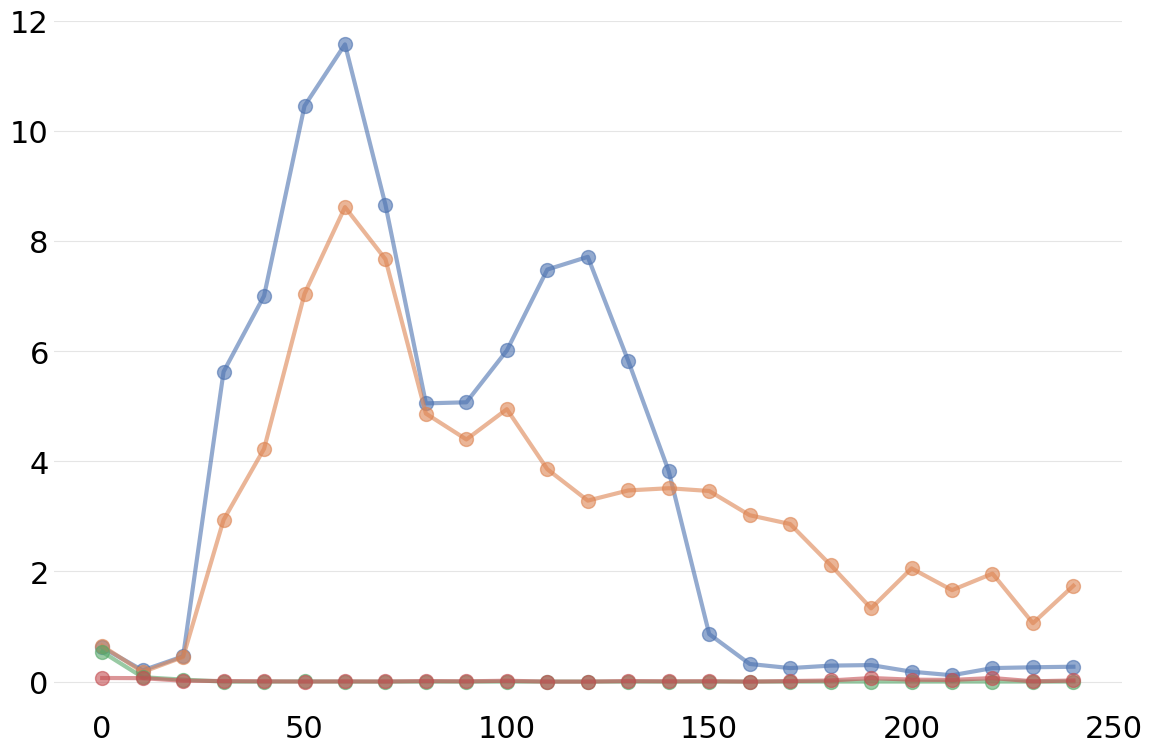

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
ax.tick_params(axis='y', which='both', length=0)
ax.tick_params(axis='x', which='both', length=0)
ax.set_ylim(-0.5, 12)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

for idx, phenomenon in enumerate(phenomena):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_qwen_base["step"],
            df_qwen_base[phenomenon],
            marker=qwen_marker,  # Use different markers for each line
            markersize=10,
            color=deep[idx],
            label=f"{phenomena_to_label[phenomenon]}",
            alpha=0.6,
            linewidth=3
        )
# ax.legend()
plt.tight_layout()
plt.show()

findfont: Font family [] not found. Falling back to DejaVu Sans.


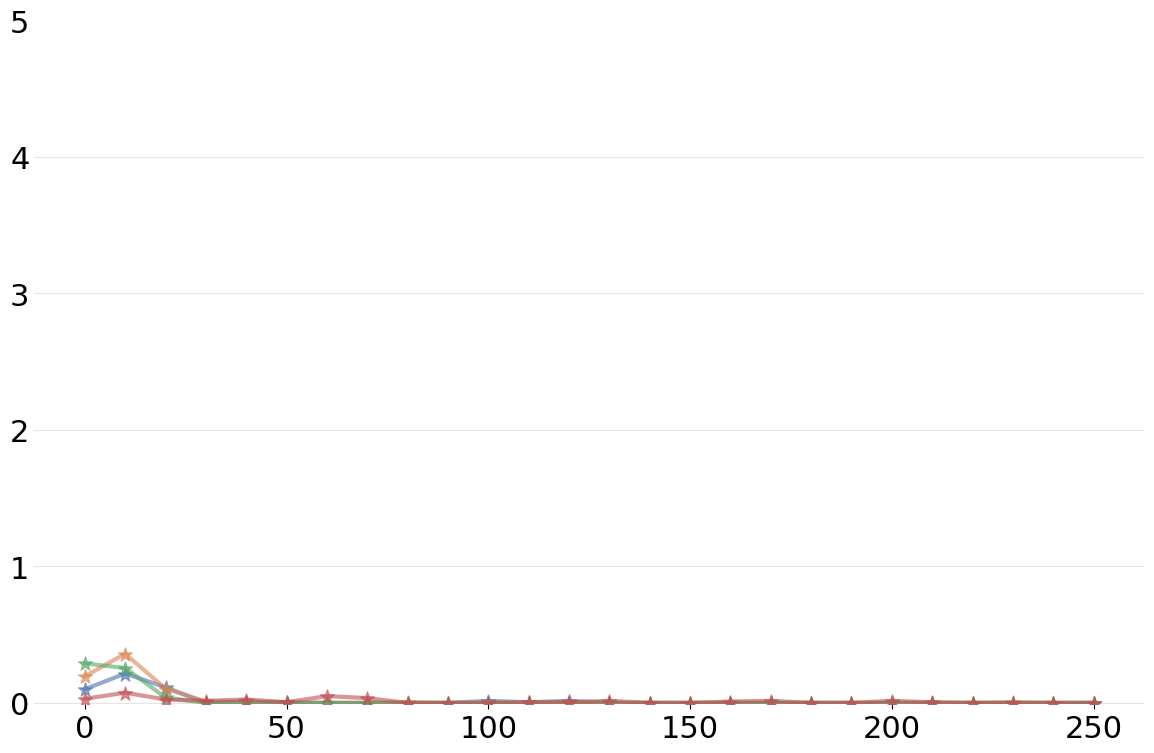

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(False) 
# remove y tick dashes
ax.tick_params(axis='y', which='both', length=0)

ax.set_ylim(-0.01, 5)

plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

for idx, phenomenon in enumerate(phenomena):
    if phenomenon in df_llama_base.columns:
        ax.plot(
            df_llama_base["step"],
            df_llama_base[phenomenon],
            marker=llama_marker,
            markersize=10,
            color=deep[idx],
            label=f"{phenomena_to_label[phenomenon]}",
            alpha=0.6,
            linewidth=3
        )

plt.tight_layout()
plt.show()

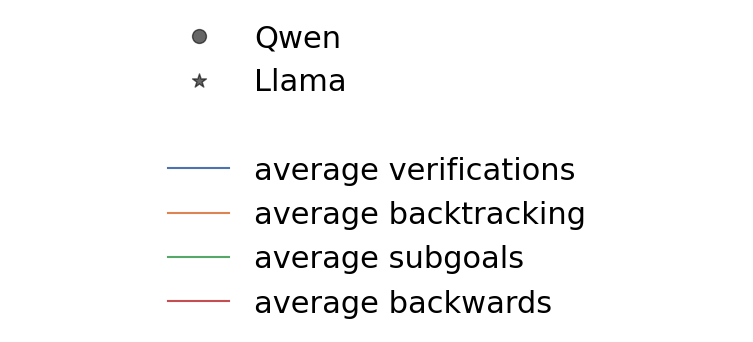

In [12]:
from matplotlib.lines import Line2D
# Create a separate figure for the legend
fig_legend = plt.figure(figsize=(8, 4))
ax_legend = fig_legend.add_subplot(111)
ax_legend.axis('off')

# Create legend handles
legend_elements = []

# Add model markers
legend_elements.append(Line2D([0], [0], marker=qwen_marker, color='black',
                            label='Qwen', markersize=10, linestyle='none', alpha=0.6, linewidth=3))
legend_elements.append(Line2D([0], [0], marker=llama_marker, color='black',
                            label='Llama', markersize=10, linestyle='none', alpha=0.6, linewidth=3))

# Add separator
legend_elements.append(Line2D([0], [0], color='none', label=''))

# Add measure colors
for phenomenon in phenomena:
    measure = phenomenon.split('_')[-1]
    legend_elements.append(Line2D([0], [0], color=deep[phenomena.index(phenomenon)],
                                label=phenomena_to_label[phenomenon]))

# Create the legend
ax_legend.legend(handles=legend_elements, loc='center', ncol=1, frameon=False)
plt.tight_layout()
plt.show()

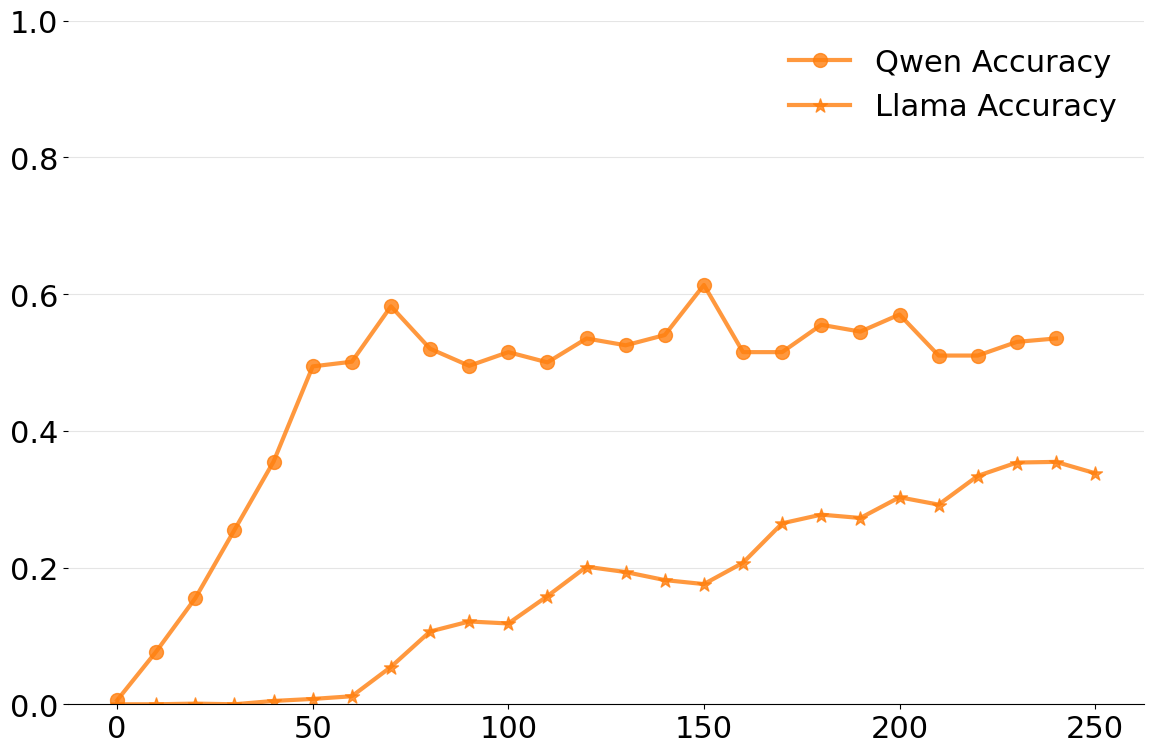

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.grid(False) 
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
ax.set_ylim(0, 1)


statistics = ["accuracy"]
statistics_to_label = {"accuracy": "Accuracy"}

for i, phenomenon in enumerate(statistics):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_qwen_base["step"],
            df_qwen_base[phenomenon],
            marker=qwen_marker,
            markersize=10,
            label=f"Qwen {statistics_to_label[phenomenon]}",
            color='tab:orange',
            alpha=0.8,
            linewidth=3
        )
    if phenomenon in df_llama_base.columns:
        ax.plot(
            df_llama_base["step"],
            df_llama_base[phenomenon],
            marker=llama_marker,
            markersize=10,
            label=f"Llama {statistics_to_label[phenomenon]}",
            color='tab:orange',
            alpha=0.8,
            linewidth=3
        )


ax.legend(frameon=False)
plt.tight_layout()
plt.show()

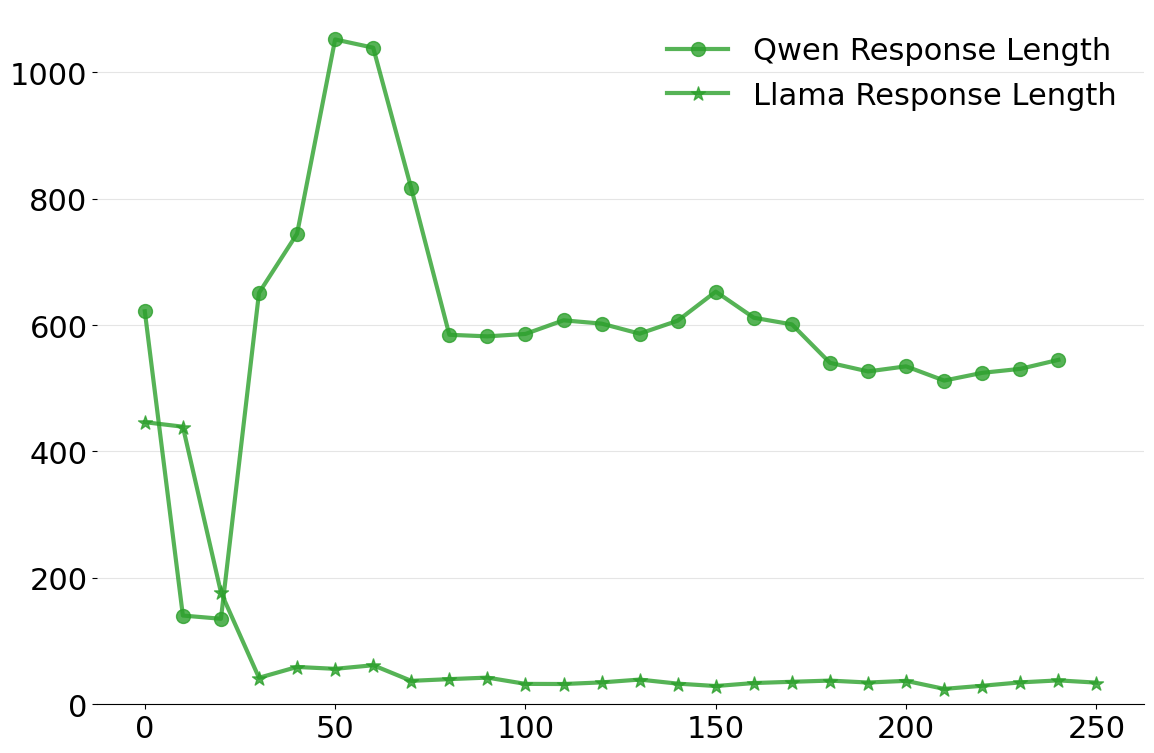

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.grid(False) 
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
ax.set_ylim(0, 1100)

statistics = ["response_length"]
statistics_to_label = {"response_length": "Response Length"}

for i, phenomenon in enumerate(statistics):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_qwen_base["step"],
            df_qwen_base[phenomenon],
            marker=qwen_marker,
            markersize=10,
            label=f"Qwen {statistics_to_label[phenomenon]}",
            color='tab:green',
            alpha=0.8,
            linewidth=3
        )
    if phenomenon in df_llama_base.columns:
        ax.plot(
            df_llama_base["step"],
            df_llama_base[phenomenon],
            marker=llama_marker,
            markersize=10,
            label=f"Llama {statistics_to_label[phenomenon]}",
            color='tab:green',
            alpha=0.8,
            linewidth=3
        )
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

# Warm Start SFT + RL effects

In [15]:
all_sft_color_bindings = {
    'base_ppo': colorblind[0],
    'only_backtracking': colorblind[1],
    'backtracking_subgoal': colorblind[2],
    'backtracking_verification': colorblind[3],
    'backtracking_backward': colorblind[4],
    'all_strategies': colorblind[5],
    'no_positive_all_strategies': colorblind[6],
    'empty_cot': colorblind[7],
    'dots': colorblind[8],
    'human_cot': colorblind[9],
}

In [16]:
conditions = ['base_ppo', 'only_backtracking', 'backtracking_subgoal', 'backtracking_verification', 'backtracking_backward', 'all_strategies']

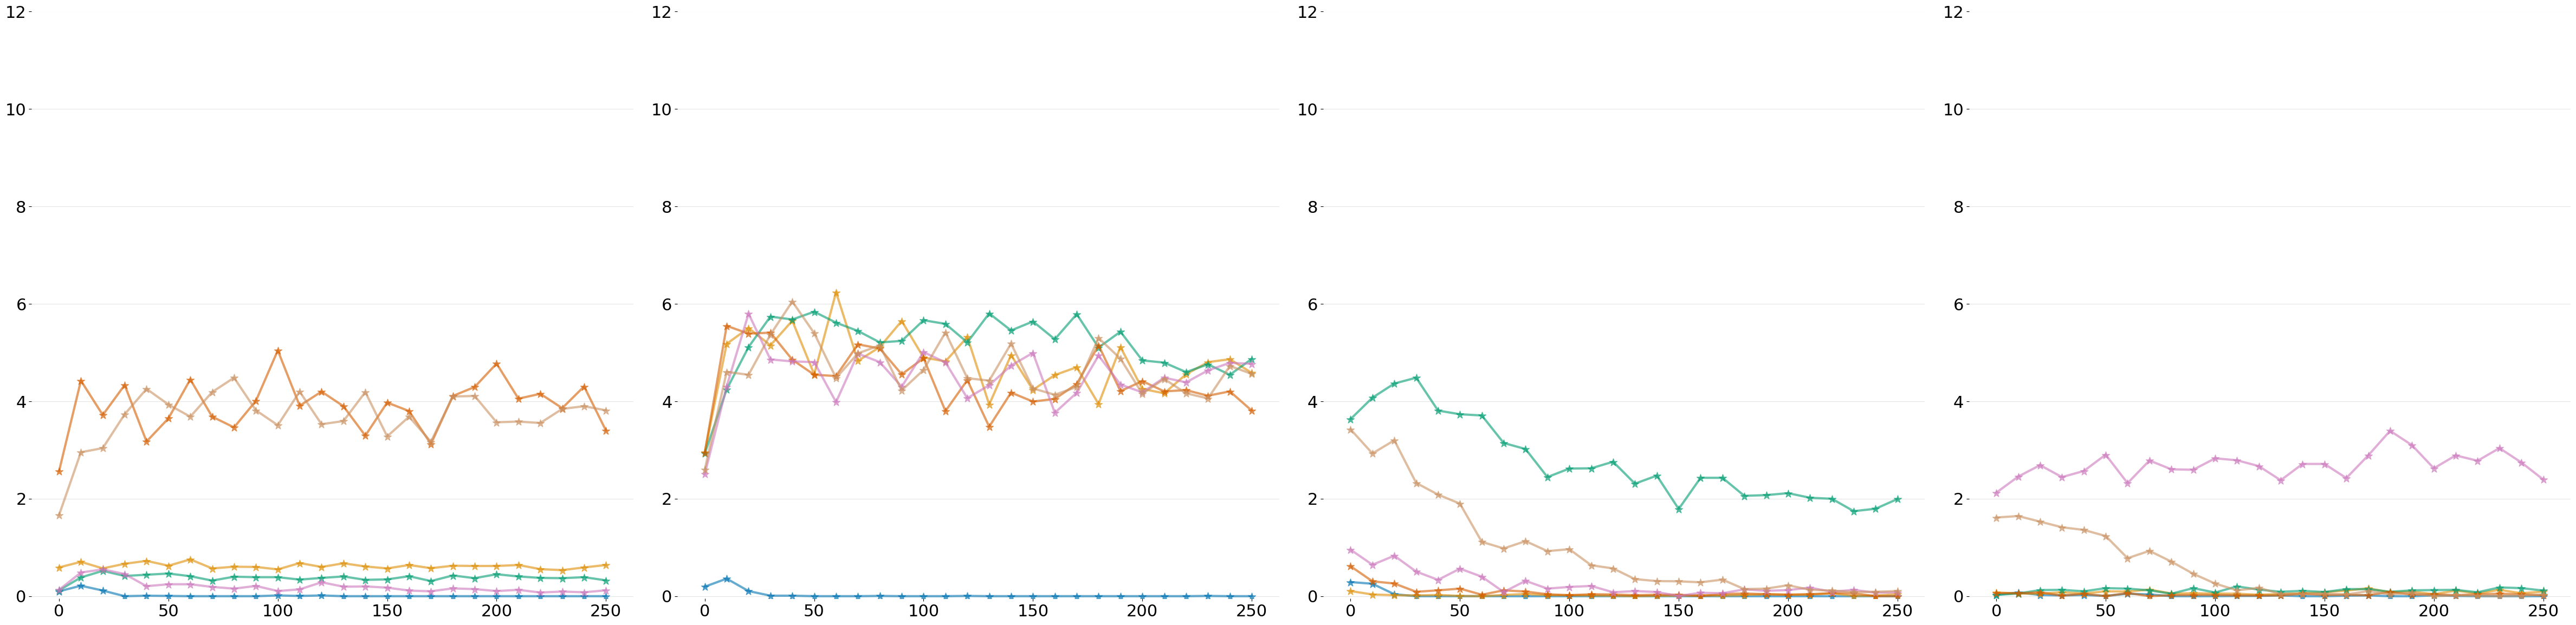

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(48, 12))

for idx, phenomenon in enumerate(phenomena):
    ax = axs[idx]
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.yaxis.grid(False) 
    ax.set_ylim(-0.05, 12)
    ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
    
    for condition_idx, condition in enumerate(conditions):
        condition_df = df_llama[df_llama["condition"] == condition].sort_values("step")
        condition_df = condition_df[condition_df["step"] <= 250]
        ax.plot(
            condition_df["step"],
            condition_df[phenomenon],
            marker=llama_marker,
            markersize=10,
            label=f"{condition}",
            color=all_sft_color_bindings[condition],
            alpha=0.6,
            linewidth=3
        )
    
    # ax.set_title(phenomena_to_label[phenomenon].title())
    # ax.set_xlabel("step")
    # if idx == 0:  # Only show y-label for the first subplot
    #     ax.set_ylabel("average count")
    
    # if idx == len(phenomena) - 1:
    #     ax.legend()

plt.tight_layout()
plt.show()

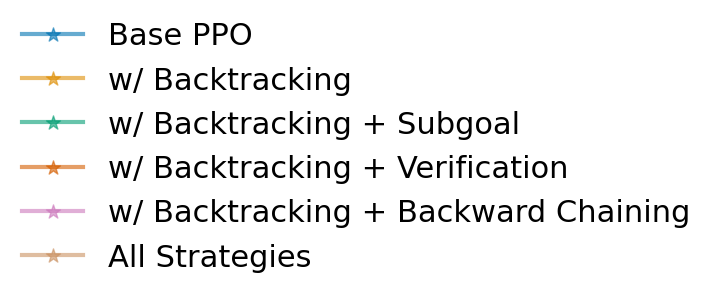

In [18]:
# Create a new figure for just the legend
fig_legend = plt.figure(figsize=(3, 3))  # Adjusted size for vertical stacking

# Create dummy lines with labels
lines = []
labels = {
    'base_ppo': 'Base PPO',
    'only_backtracking': 'w/ Backtracking',
    'backtracking_subgoal': 'w/ Backtracking + Subgoal',
    'backtracking_verification': 'w/ Backtracking + Verification',
    'backtracking_backward': 'w/ Backtracking + Backward Chaining',
    'all_strategies': 'All Strategies',
}

for key, label in labels.items():
    line = plt.Line2D([0], [0], 
                      color=all_sft_color_bindings[key],
                      marker=llama_marker,
                      markersize=10,
                      label=label,
                      linestyle='-',
                      markeredgewidth=1,
                      markerfacecolor=all_sft_color_bindings[key], linewidth=3, alpha=0.6)
    lines.append(line)

# Create the legend
fig_legend.legend(lines, labels.values(), 
                 loc='center', 
                 ncol=1,           # Changed to 1 column for vertical stacking
                 frameon=False,
                 borderaxespad=0,  # Reduce padding
                 handlelength=2)   # Remove the connecting lines

# Remove axes
plt.gca().set_visible(False)

plt.tight_layout()
plt.show()

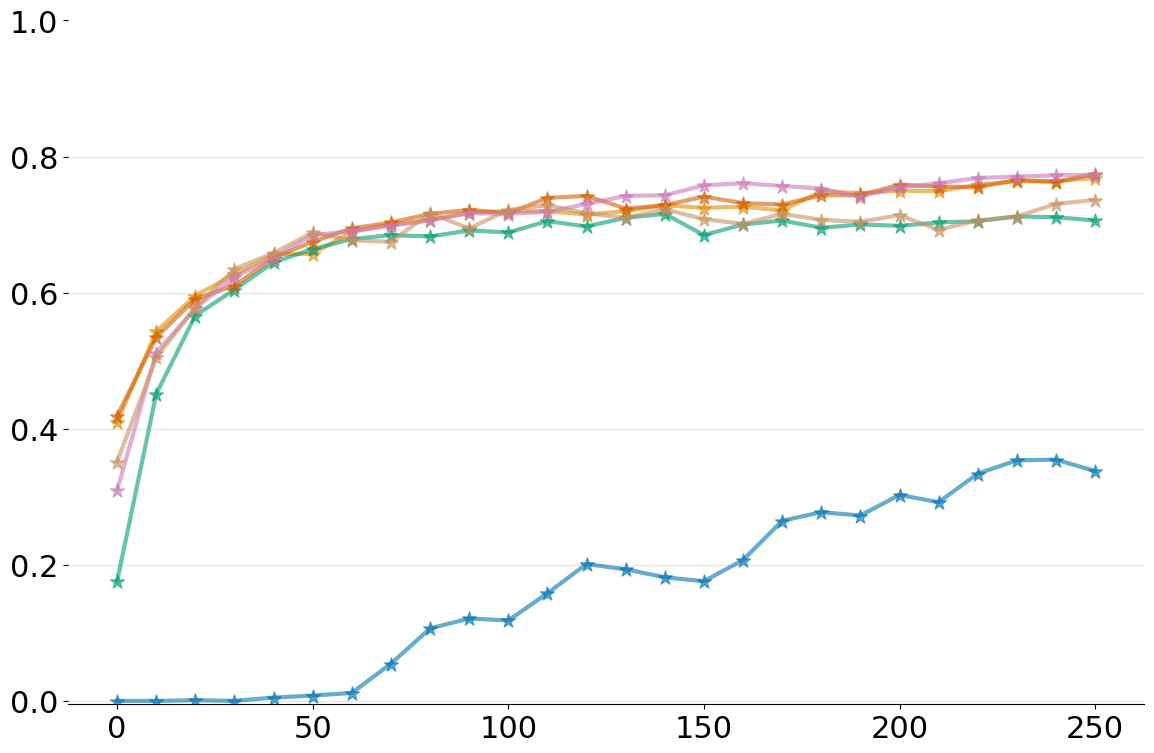

In [19]:
statistics = ["accuracy"]
statistics_to_label = {"accuracy": "Accuracy"}
fig, ax = plt.subplots(figsize=(12, 8))

for idx, phenomenon in enumerate(statistics):
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.grid(False) 
    ax.set_ylim(-0.005, 1.)
    ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
    
    for condition_idx, condition in enumerate(conditions):
        condition_df = df_llama[df_llama["condition"] == condition].sort_values("step")
        condition_df = condition_df[condition_df["step"] <= 250]
        ax.plot(
            condition_df["step"],
            condition_df[phenomenon],
            marker=qwen_marker,
            markersize=10,
            label=f"{condition}",
            color=all_sft_color_bindings[condition],
            alpha=0.6,
            linewidth=3
        )
    
    # ax.set_title(phenomena_to_label[phenomenon].title())
    # ax.set_xlabel("step")
    # if idx == 0:  # Only show y-label for the first subplot
    #     ax.set_ylabel("average count")
    
    # if idx == len(phenomena) - 1:
    #     ax.legend()

plt.tight_layout()
plt.show()

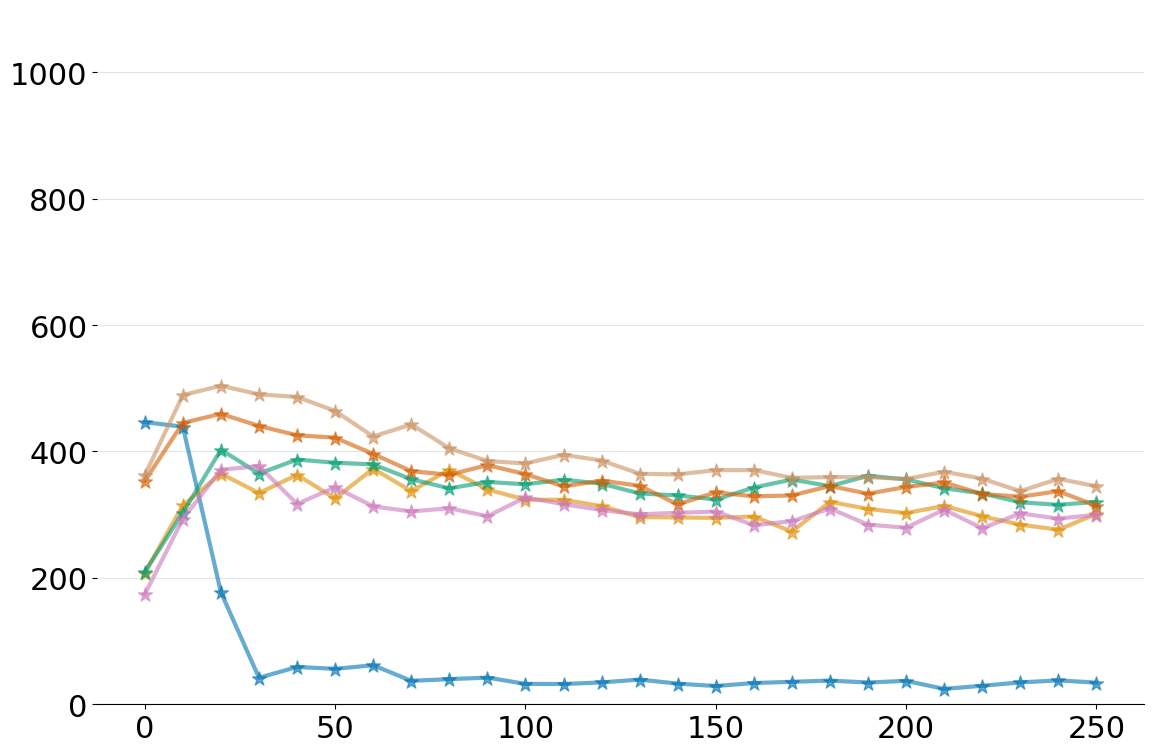

In [20]:
statistics = ["response_length"]
statistics_to_label = {"response_length": "Response Length"}
fig, ax = plt.subplots(figsize=(12, 8))

for idx, phenomenon in enumerate(statistics):
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.grid(False) 
    ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
    ax.set_ylim(0, 1100)
    
    for condition_idx, condition in enumerate(conditions):
        condition_df = df_llama[df_llama["condition"] == condition].sort_values("step")
        condition_df = condition_df[condition_df["step"] <= 250]
        ax.plot(
            condition_df["step"],
            condition_df[phenomenon],
            marker=llama_marker,
            markersize=10,
            label=f"{condition}",
            color=all_sft_color_bindings[condition],
            alpha=0.6,
            linewidth=3
        )
    
    # ax.set_title(phenomena_to_label[phenomenon].title())
    # ax.set_xlabel("step")
    # if idx == 0:  # Only show y-label for the first subplot
    #     ax.set_ylabel("average count")
    
    # if idx == len(phenomena) - 1:
    #     ax.legend()

plt.tight_layout()
plt.show()

# Behavioral evaluation of all-wrong SFT data

In [97]:
conditions = ["no_positive_all_strategies", "all_strategies", "base_ppo"]

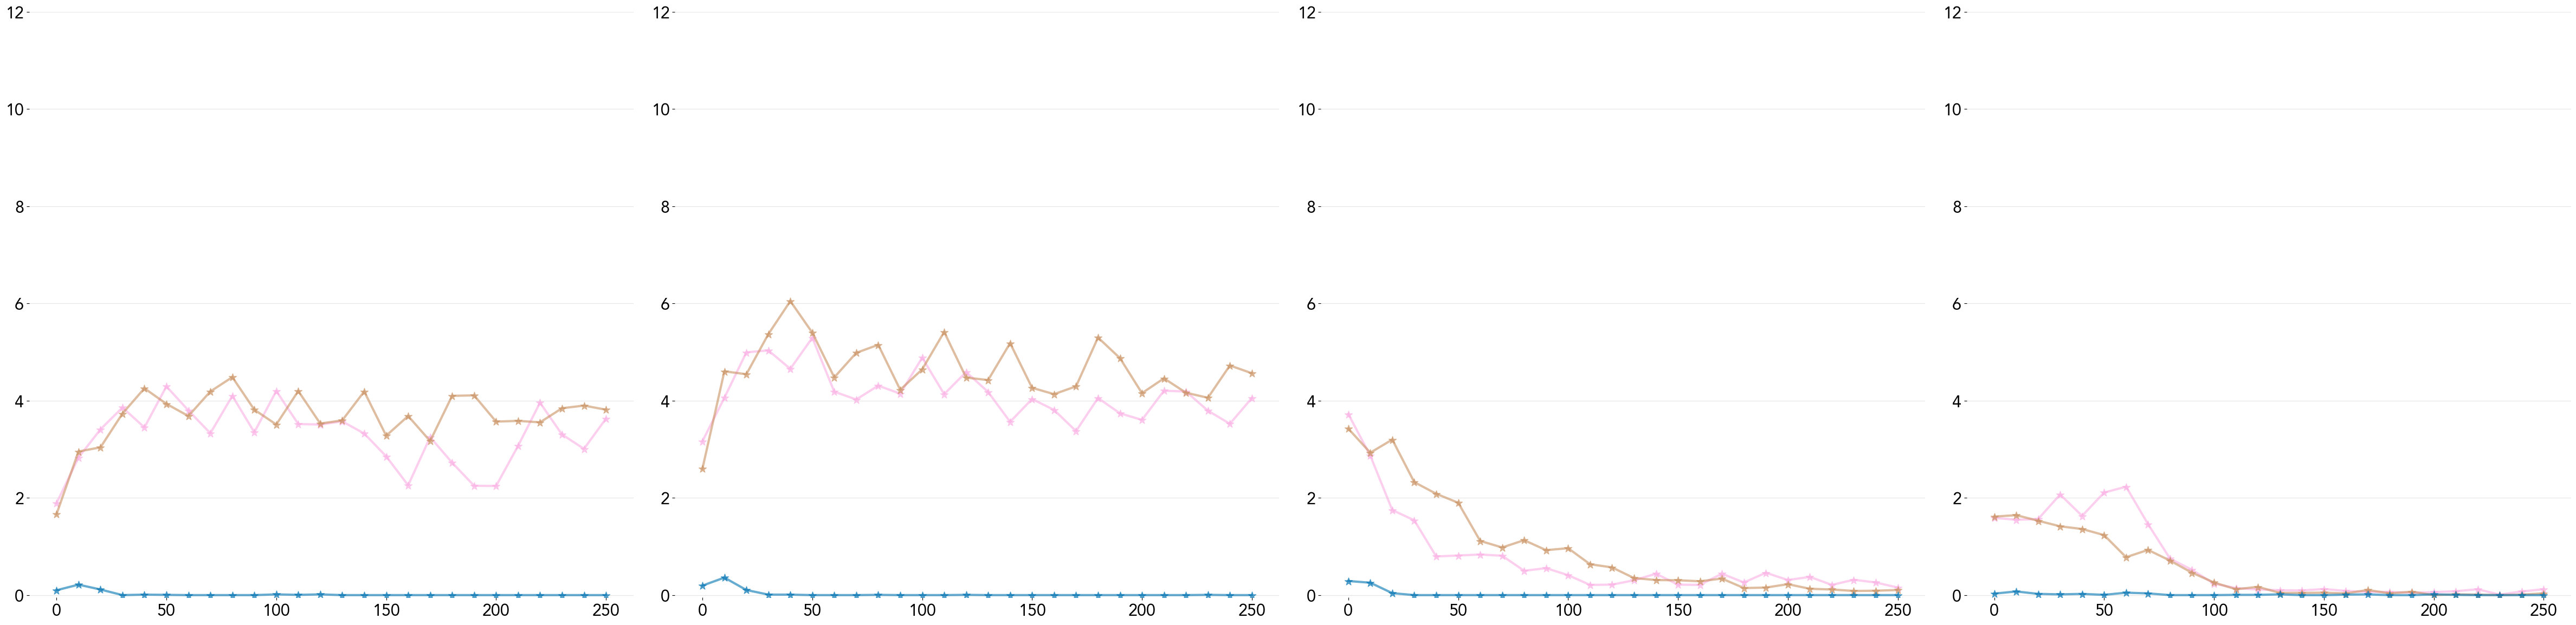

In [86]:
fig, axs = plt.subplots(1, 4, figsize=(48, 12))


for idx, phenomenon in enumerate(phenomena):
    ax = axs[idx]
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.yaxis.grid(False) 
    ax.set_ylim(-0.05, 12)
    ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
    
    for condition_idx, condition in enumerate(conditions):
        condition_df = df_llama[df_llama["condition"] == condition].sort_values("step")
        condition_df = condition_df[condition_df["step"] <= 250]
        ax.plot(
            condition_df["step"],
            condition_df[phenomenon],
            marker=llama_marker,
            markersize=10,
            color=all_sft_color_bindings[condition],
            label=f"{condition}",
            alpha=0.6,
            linewidth=3
        )
    
plt.tight_layout()
plt.show()

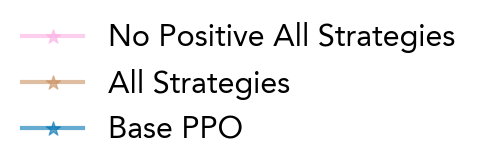

In [87]:
# Create a new figure for just the legend
fig_legend = plt.figure(figsize=(3, 3))  # Adjusted size for vertical stacking

# Create dummy lines with labels
lines = []

labels = {
    'no_positive_all_strategies': 'No Positive All Strategies',
    'all_strategies': 'All Strategies',
    'base_ppo': 'Base PPO',
}

for condition, label in labels.items():
    line = plt.Line2D([0], [0], 
                      color=all_sft_color_bindings[condition],
                      marker=llama_marker,
                      markersize=10,
                      label=label,
                      linestyle='-',
                      markeredgewidth=1,
                      markerfacecolor=all_sft_color_bindings[condition], linewidth=3, alpha=0.6)
    lines.append(line)

# Create the legend
fig_legend.legend(lines, labels.values(), 
                 loc='center', 
                 ncol=1,           # Changed to 1 column for vertical stacking
                 frameon=False,
                 borderaxespad=0,  # Reduce padding
                 handlelength=2)   # Remove the connecting lines

# Remove axes
plt.gca().set_visible(False)

plt.tight_layout()
plt.show()

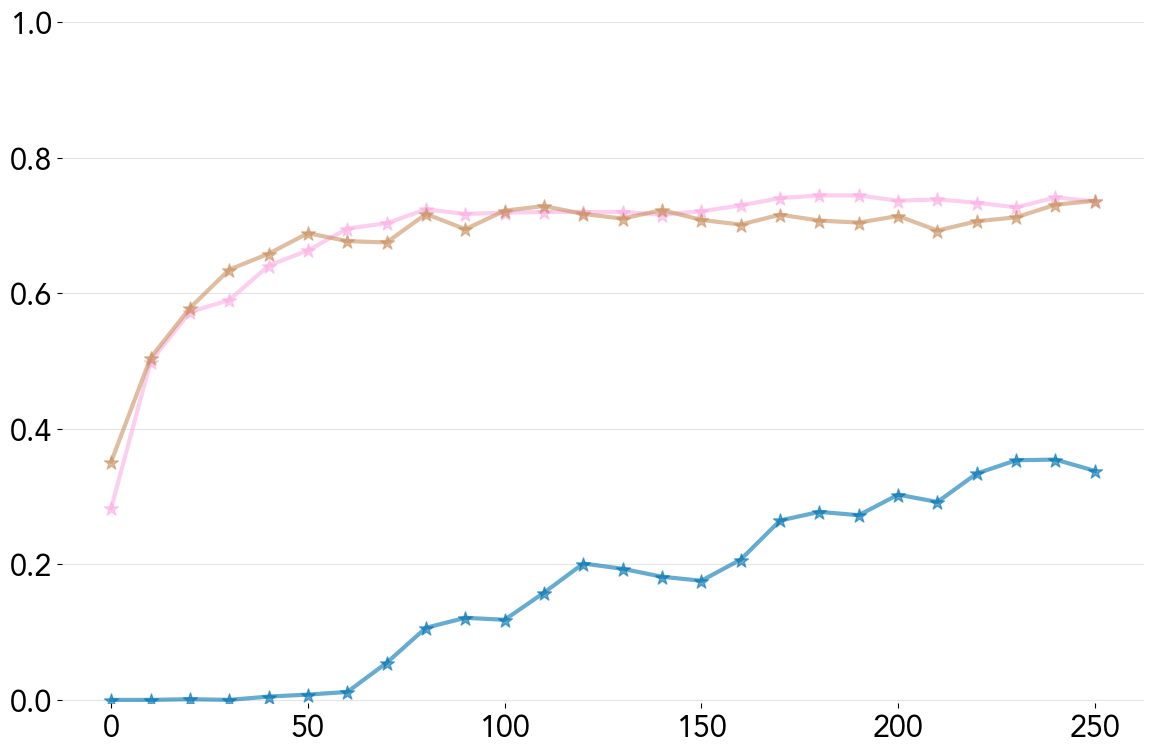

In [ ]:
statistics = ["accuracy"]
statistics_to_label = {"accuracy": "Accuracy"}
fig, ax = plt.subplots(figsize=(12, 8))

for idx, phenomenon in enumerate(statistics):
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.grid(False) 
    ax.set_ylim(-0.005, 1.)
    ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
    
    for condition_idx, condition in enumerate(conditions):
        condition_df = df_llama[df_llama["condition"] == condition].sort_values("step")
        condition_df = condition_df[condition_df["step"] <= 250]
        ax.plot(
            condition_df["step"],
            condition_df[phenomenon],
            marker=llama_marker,
            markersize=10,
            label=f"{condition}",
            color=all_sft_color_bindings[condition],
            alpha=0.6,
            linewidth=3
        )
    
    # ax.set_title(phenomena_to_label[phenomenon].title())
    # ax.set_xlabel("step")
    # if idx == 0:  # Only show y-label for the first subplot
    #     ax.set_ylabel("average count")
    
    # if idx == len(phenomena) - 1:
    #     ax.legend()

plt.tight_layout()
plt.show()

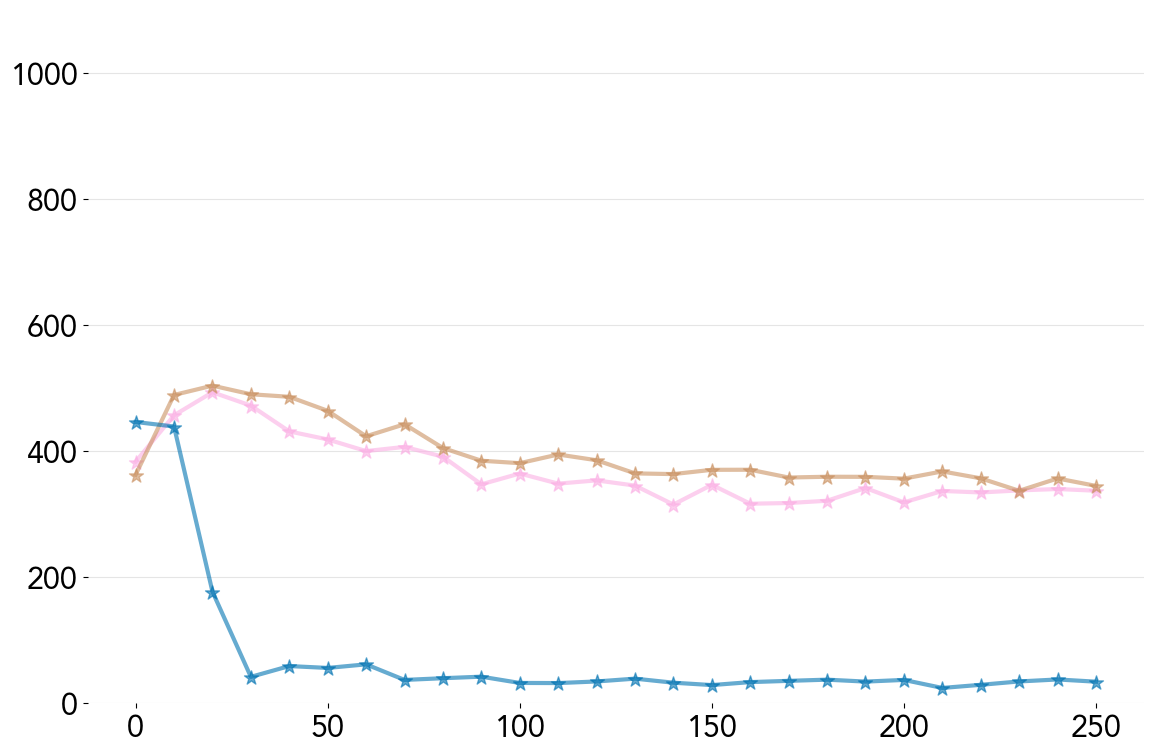

In [89]:
statistics = ["response_length"]
statistics_to_label = {"response_length": "Response Length"}
fig, ax = plt.subplots(figsize=(12, 8))

for idx, phenomenon in enumerate(statistics):
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.yaxis.grid(False) 
    ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
    ax.set_ylim(0, 1100)
    
    for condition_idx, condition in enumerate(conditions):
        condition_df = df_llama[df_llama["condition"] == condition].sort_values("step")
        condition_df = condition_df[condition_df["step"] <= 250]
        ax.plot(
            condition_df["step"],
            condition_df[phenomenon],
            marker=llama_marker,
            markersize=10,
            label=f"{condition}",
            color=all_sft_color_bindings[condition],
            alpha=0.6,
            linewidth=3
        )
    
    # ax.set_title(phenomena_to_label[phenomenon].title())
    # ax.set_xlabel("step")
    # if idx == 0:  # Only show y-label for the first subplot
    #     ax.set_ylabel("average count")
    
    # if idx == len(phenomena) - 1:
    #     ax.legend()

plt.tight_layout()
plt.show()

# Success Rates Bar Plot
### maybe this should be a line plot instead of a bar plot?

In [63]:
conditions = ['base_ppo', 'all_strategies', 'dots', 'empty_cot']
metrics = ['accuracy']

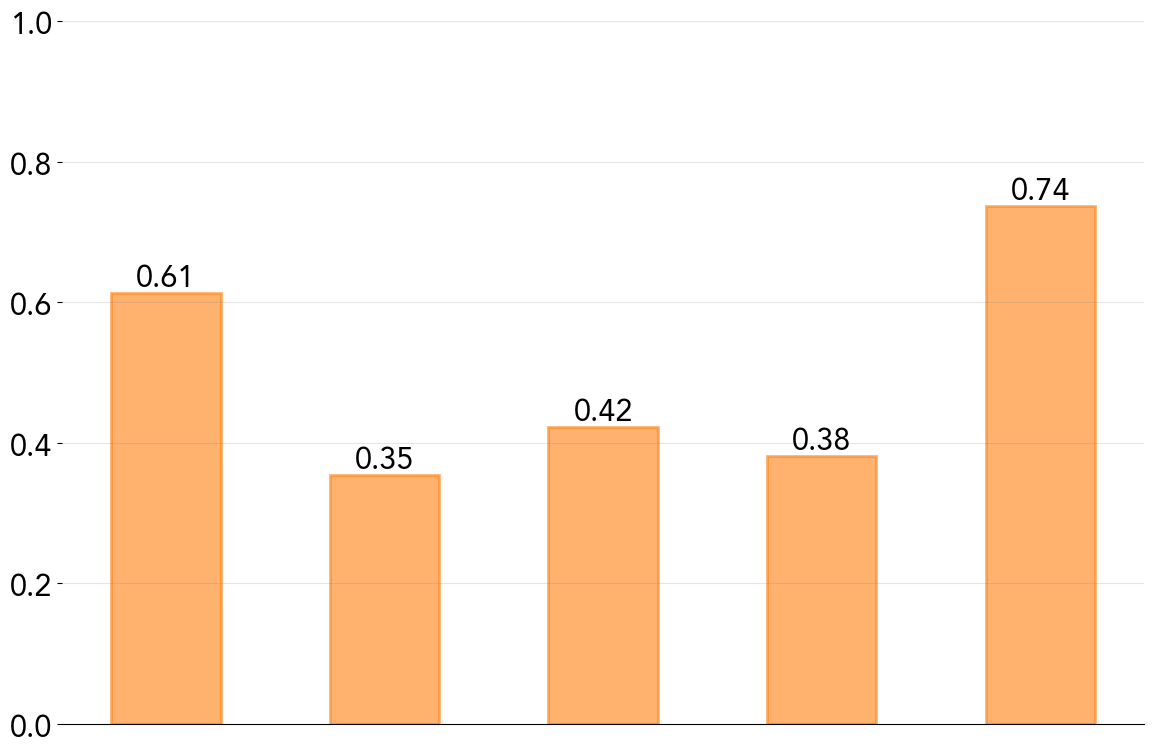

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['hatch.linewidth'] = 0.1

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.grid(False)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
ax.set_ylim(0, 1)

# Define our four conditions.
# For "qwen_base" and "llama_base", use the corresponding dataframe.
# For "empty_cot" and "dots", only use the LLaMA dataframe.
conditions = ["qwen_base_ppo", "llama_base_ppo", "empty_cot", "dots", "llama_all_strategies"]

# Define fixed colors for each condition
color  = "tab:orange"

# Lists to store values, colors, and labels for each bar
bar_values = []
bar_colors = []
bar_labels = []

for cond in conditions:
    if cond.startswith("qwen_"):
        # For "qwen_base", extract "base" and use df_qwen
        base_cond = cond.split("_", 1)[1]
        value = df_qwen[df_qwen['condition'] == base_cond]['accuracy'].max()
        bar_values.append(value)
        bar_colors.append(color)
        bar_labels.append("Qwen Base")
    elif cond.startswith("llama_"):
        # For "llama_base", extract "base" and use df_llama
        base_cond = cond.split("_", 1)[1]
        value = df_llama[df_llama['condition'] == base_cond]['accuracy'].max()
        bar_values.append(value)
        bar_colors.append(color)
        bar_labels.append("Llama Base" if base_cond == "base_ppo" else "Llama All Strategies")
    elif cond in ["empty_cot", "dots"]:
        # Use only LLaMA data for these conditions
        value = df_llama[df_llama['condition'] == cond]['accuracy'].max()
        bar_values.append(value)
        if cond == "empty_cot":
            bar_colors.append(color)
            bar_labels.append("Empty CoT")
        elif cond == "dots":
            bar_colors.append(color)
            bar_labels.append("Dots")
    else:
        # Fallback in case an unexpected condition appears
        value = df_llama[df_llama['condition'] == cond]['accuracy'].max()
        bar_values.append(value)
        bar_colors.append("gray")
        bar_labels.append(cond)

# Define x positions for the bars and the bar width
x = np.arange(len(conditions))
width = 0.5

# Plot the bars with a filled color (alpha 0.6) and an edge color
bars = ax.bar(x, bar_values, width=width, color=bar_colors, alpha=0.6,
              edgecolor=bar_colors, linewidth=2)

# Function to label each bar with its height value
def autolabel(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2f}',
            ha='center',
            va='bottom'
        )

autolabel(bars, ax)

# Set x-axis tick labels and axis title
ax.set_xticks([])

plt.tight_layout()
plt.show()


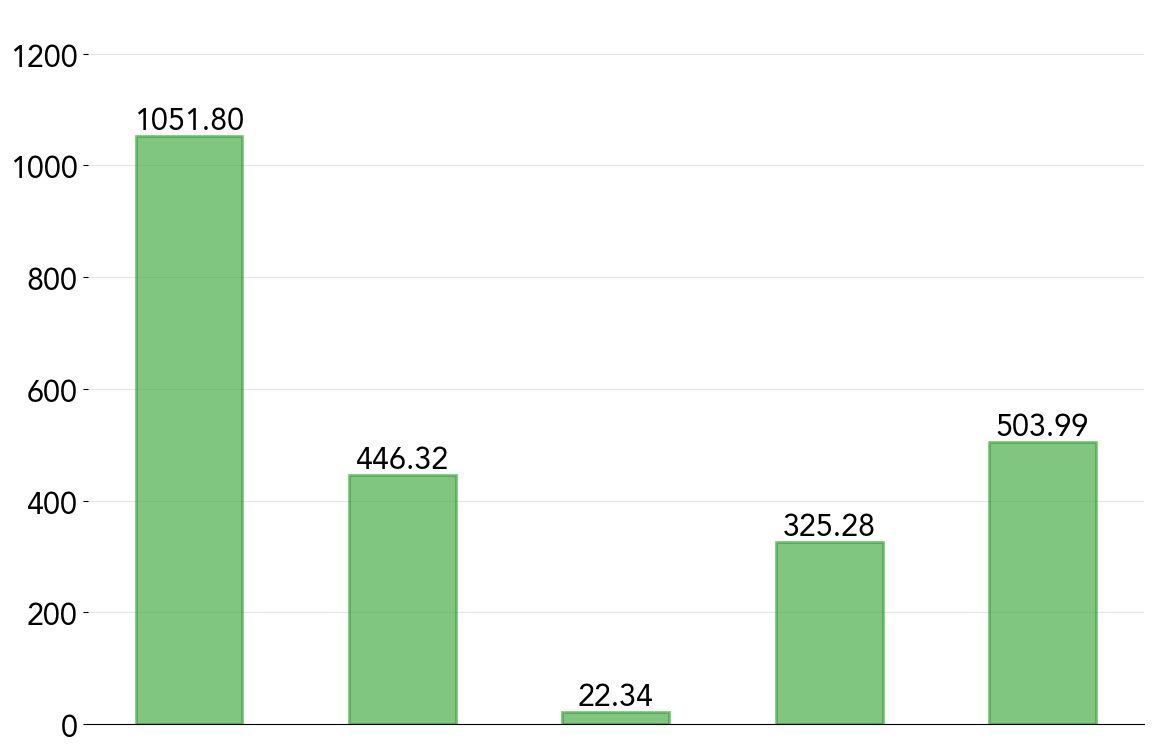

In [74]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['hatch.linewidth'] = 0.1

# Example conditions
conditions = ["qwen_base_ppo", "llama_base_ppo", "empty_cot", "dots", "llama_all_strategies"]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Hide unnecessary spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# Add a light grid on the y-axis
ax.yaxis.grid(False)
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

# Define colors
color  = "tab:green"

bar_values = []
bar_colors = []
bar_labels = []

# Loop through conditions and pick values from the appropriate dataframe
for cond in conditions:
    if cond.startswith("qwen_"):
        # e.g. "qwen_base_ppo" -> condition in df_qwen is "base_ppo"
        base_cond = cond.split("_", 1)[1]
        value = df_qwen[df_qwen['condition'] == base_cond]['response_length'].max()
        bar_values.append(value)
        bar_colors.append(color)
        bar_labels.append("Qwen Base PPO")

    elif cond.startswith("llama_"):
        # e.g. "llama_base_ppo" -> condition in df_llama is "base_ppo"
        base_cond = cond.split("_", 1)[1]
        value = df_llama[df_llama['condition'] == base_cond]['response_length'].max()
        bar_values.append(value)
        bar_colors.append(color)
        bar_labels.append("Llama Base PPO" if base_cond == "base_ppo" else "Llama All Strategies")

    elif cond in ["empty_cot", "dots"]:
        # Use only LLaMA data for these conditions
        value = df_llama[df_llama['condition'] == cond]['response_length'].max()
        bar_values.append(value)
        if cond == "empty_cot":
            bar_colors.append(color)
            bar_labels.append("Empty CoT (Llama)")
        else:
            bar_colors.append(color)
            bar_labels.append("Dots (Llama)")

    else:
        # Fallback if there's an unexpected condition
        value = df_llama[df_llama['condition'] == cond]['response_length'].max()
        bar_values.append(value)
        bar_colors.append("gray")
        bar_labels.append(cond)

# Create the x positions and bar width
x = np.arange(len(conditions))
width = 0.5

# Plot the bars
bars = ax.bar(
    x,
    bar_values,
    width=width,
    color=bar_colors,
    alpha=0.6,
    edgecolor=bar_colors,
    linewidth=2
)

# Function to label each bar with its height
def autolabel(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2f}',
            ha='center',
            va='bottom'
        )

# Label the bars
autolabel(bars, ax)

# Set x-axis labels
ax.set_xticks([])
ax.set_ylim(0, 1280)

plt.tight_layout()
plt.show()


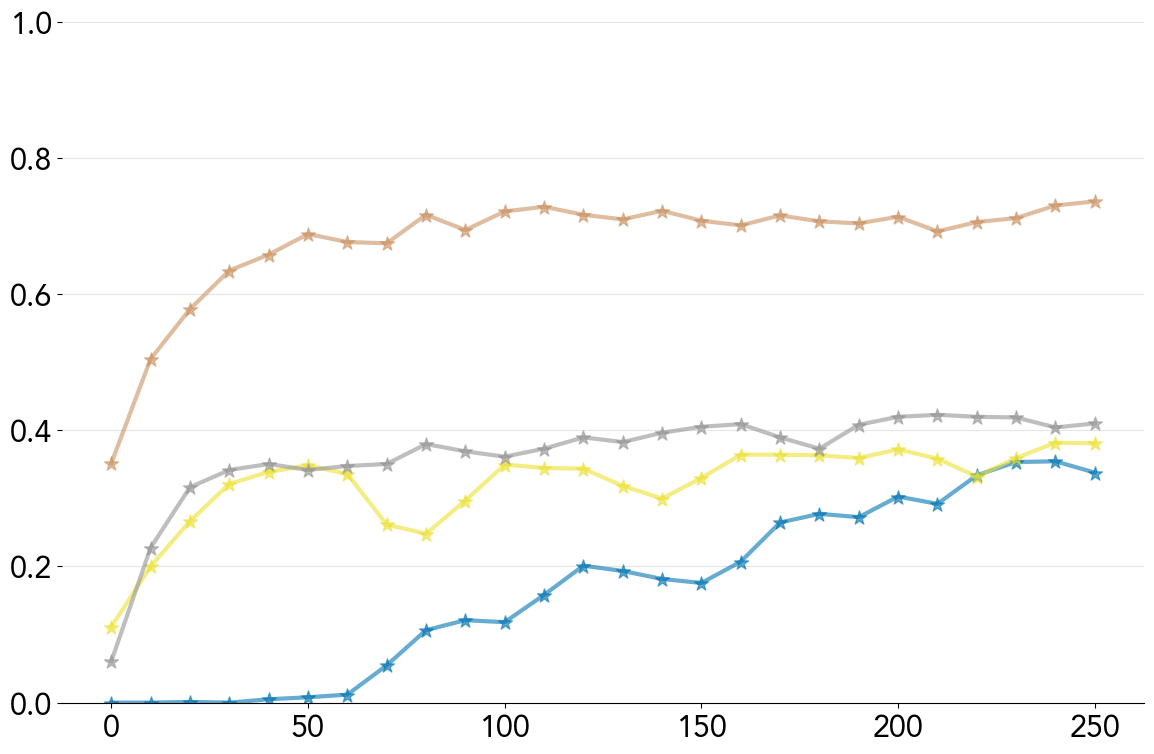

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))


for idx, phenomenon in enumerate(metrics):
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.grid(False) 
    ax.set_ylim(-0.001, 1.)
    ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
    
    for condition_idx, condition in enumerate(conditions):
        condition_df = df_llama[df_llama["condition"] == condition].sort_values("step")
        condition_df = condition_df[condition_df["step"] <= 250]
        ax.plot(
            condition_df["step"],
            condition_df[phenomenon],
            marker=llama_marker,
            markersize=10,
            color=all_sft_color_bindings[condition],
            label=f"{condition}",
            alpha=0.6,
            linewidth=3
        )
    # ax.legend(frameon=False)
    
plt.tight_layout()
plt.show()

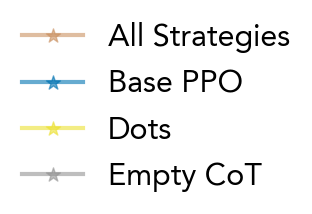

In [41]:
# Create a new figure for just the legend
fig_legend = plt.figure(figsize=(3, 3))  # Adjusted size for vertical stacking

# Create dummy lines with labels
lines = []

labels = {
    'all_strategies': 'All Strategies',
    'base_ppo': 'Base PPO',
    'dots': 'Dots',
    'empty_cot': 'Empty CoT',
}

for condition, label in labels.items():
    line = plt.Line2D([0], [0], 
                      color=all_sft_color_bindings[condition],
                      marker=llama_marker,
                      markersize=10,
                      label=label,
                      linestyle='-',
                      markeredgewidth=1,
                      markerfacecolor=all_sft_color_bindings[condition], alpha=0.6, linewidth=3)
    lines.append(line)

# Create the legend
fig_legend.legend(lines, labels.values(), 
                 loc='center', 
                 ncol=1,           # Changed to 1 column for vertical stacking
                 frameon=False,
                 borderaxespad=0,  # Reduce padding
                 handlelength=2)   # Remove the connecting lines

# Remove axes
plt.gca().set_visible(False)

plt.tight_layout()
plt.show()

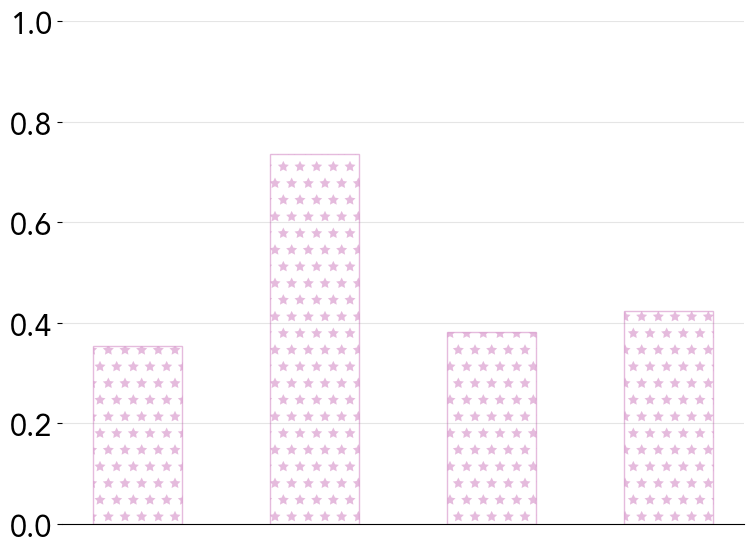

In [42]:
import matplotlib as mpl
# Increase hatch line width to make the hatch pattern appear larger
mpl.rcParams['hatch.linewidth'] = 0.1

max_accuracies = []
for condition in conditions:
    data = df_llama[df_llama['condition'] == condition]['accuracy']
    max_accuracies.append(data.max())

fig, ax = plt.subplots(figsize=(8, 6))
# Reduce spacing between bars by scaling the x positions and lowering the bar width
x = np.arange(len(conditions)) * 0.4  
bars = ax.bar(x, max_accuracies, color='none', edgecolor=colorblind[4], width=0.2)

# Add sparser hatching patterns and set hatch transparency
for idx, bar in enumerate(bars):
    bar.set_hatch('*')  # Space makes the hatch pattern sparser
    bar.set_alpha(0.5)

# Customize plot
ax.set_xticks([])
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.grid(False)
ax.set_ylim(0, 1.)
ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

plt.tight_layout()
plt.show()


# Inherent abilities in the Base models

In [43]:
df_qwen_base = df_qwen[df_qwen['condition'] == 'base_ppo']
df_llama3b_base = df_llama[df_llama['condition'] == 'base_ppo']
df_llama70b_base = df_llama[df_llama['condition'] == 'base_70b']

df_llama3b_base = df_llama3b_base[df_llama3b_base['step'] == 0]
df_qwen_base = df_qwen_base[df_qwen_base['step'] == 0]

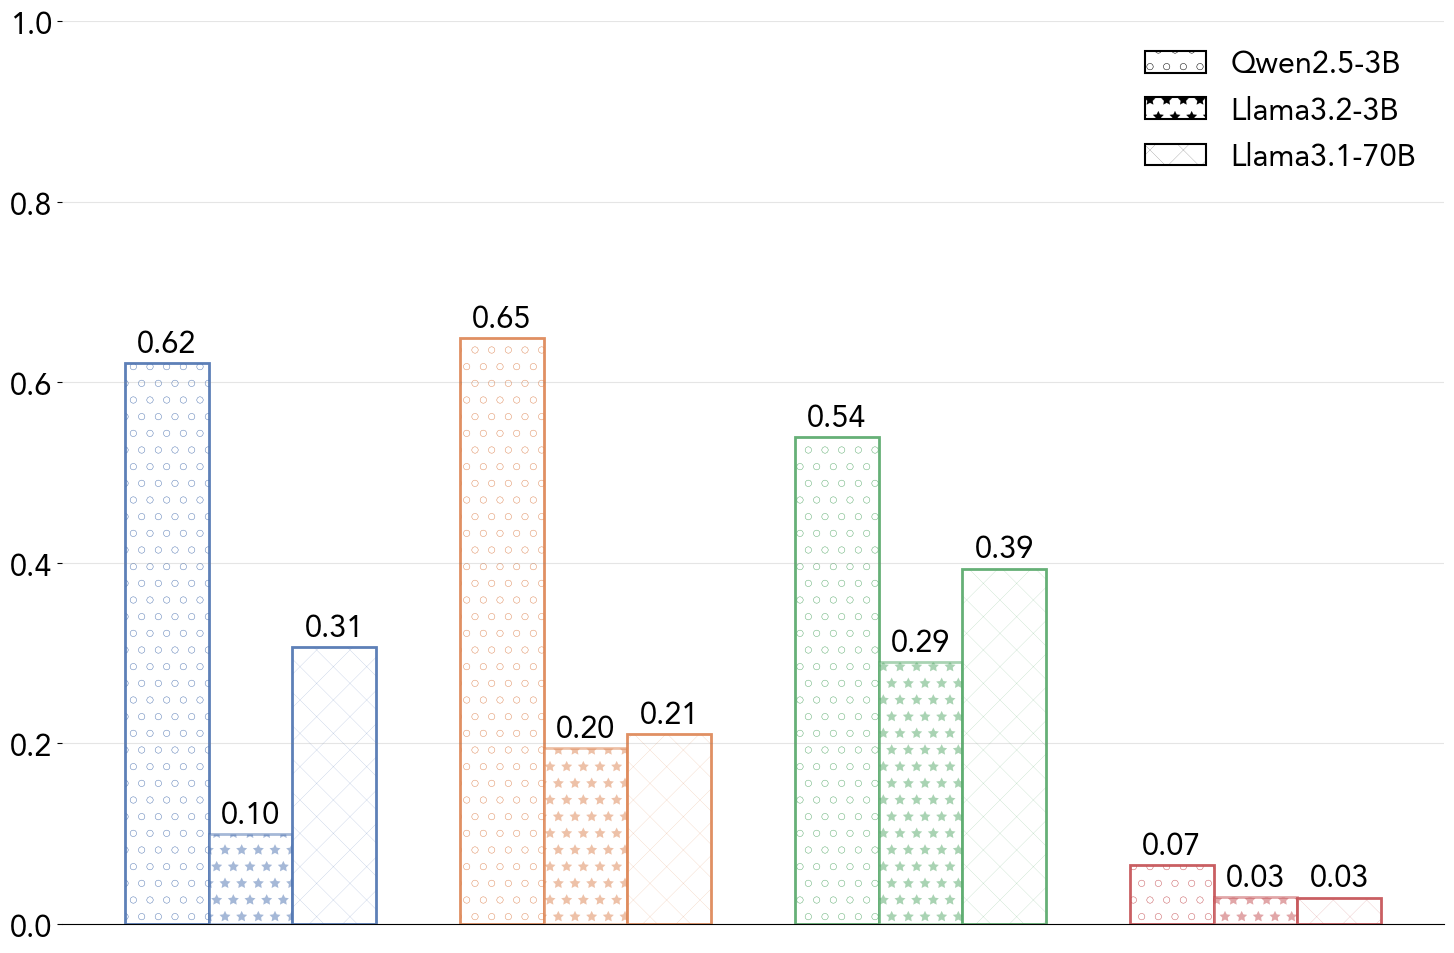

In [44]:
import matplotlib.patches as mpatches

metrics = ['avg_verifications', 'avg_backtracking', 'avg_subgoals', 'avg_backwards']

qwen = [df_qwen_base[metric].max() for metric in metrics]
llama3b = [df_llama3b_base[metric].max() for metric in metrics]
llama70b = [df_llama70b_base[metric].max() for metric in metrics]

x = np.arange(len(metrics))
width = 0.25  # Width of each bar

fig, ax = plt.subplots(figsize=(15, 10))

# Define colors for each metric from the predefined "colorblind" list
colors = [deep[i] for i in range(len(metrics))]

# Qwen Base bars: white fill with colored edges and hatch pattern 'o'
rects1 = ax.bar(x - width, qwen, width, label='Qwen Base', alpha=0.9, facecolor='white', hatch='o')
for i, rect in enumerate(rects1):
    rect.set_edgecolor(colors[i])
    rect.set_linewidth(2)

# LLaMA 3B Base bars: white fill with colored edges and hatch pattern 'x'
rects2 = ax.bar(x, llama3b, width, label='Llama 3B Base', alpha=0.5, facecolor='white', hatch='*')
for i, rect in enumerate(rects2):
    rect.set_edgecolor(colors[i])
    rect.set_linewidth(2)

rects3 = ax.bar(x + width, llama70b, width, label='Llama 70B Base', alpha=0.9, facecolor='white', hatch='X')
for i, rect in enumerate(rects3):
    rect.set_edgecolor(colors[i])
    rect.set_linewidth(2)

# Customize plot
ax.set_xticks([])
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.grid(False)
ax.set_ylim(0, 1.)
ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

circle_patch = mpatches.Patch(facecolor='white', hatch='o', edgecolor='black',
                              linewidth=1.5, label='Qwen2.5-3B')
star_patch   = mpatches.Patch(facecolor='white', hatch='*', edgecolor='black',
                              linewidth=1.5, label='Llama3.2-3B')
x_patch      = mpatches.Patch(facecolor='white', hatch='X', edgecolor='black',
                              linewidth=1.5, label='Llama3.1-70B')

ax.legend(handles=[circle_patch, star_patch, x_patch],
          loc='best', frameon=False)

plt.tight_layout()
plt.show()

# Human CoT

In [110]:
conditions = ['base_ppo', 'all_strategies', 'human_cot', 'empty_cot']

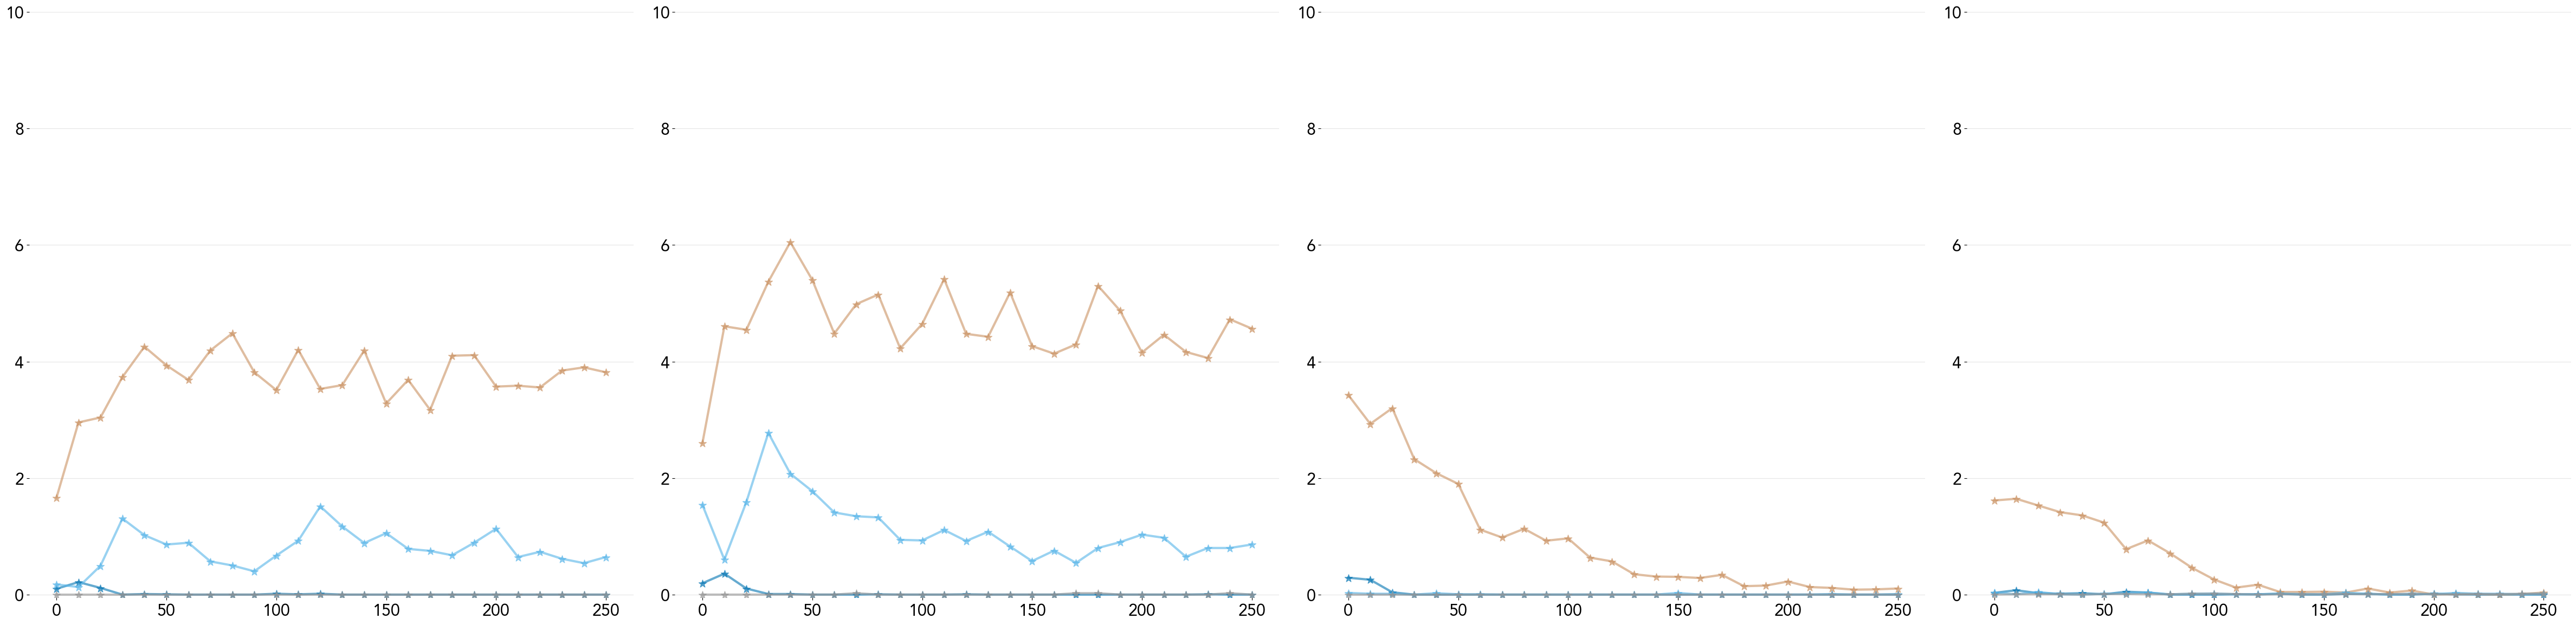

In [111]:
fig, axs = plt.subplots(1, 4, figsize=(48, 12))


for idx, phenomenon in enumerate(phenomena):
    ax = axs[idx]
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    ax.yaxis.grid(False) 
    ax.set_ylim(-0.05, 10)
    ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
    
    for condition_idx, condition in enumerate(conditions):
        condition_df = df_llama[df_llama["condition"] == condition].sort_values("step")
        condition_df = condition_df[condition_df["step"] <= 250]
        ax.plot(
            condition_df["step"],
            condition_df[phenomenon],
            marker=llama_marker,
            markersize=10,
            linewidth=3,
            label=f"{condition}",
            color=all_sft_color_bindings[condition],
            alpha=0.6,
        )
    
    # ax.set_title(phenomena_to_label[phenomenon].title())
    # ax.set_xlabel("step")
    # if idx == 0:  # Only show y-label for the first subplot
    #     ax.set_ylabel("average count")
    
    # if idx == len(phenomena) - 1:
    #     ax.legend()

plt.tight_layout()
plt.show()

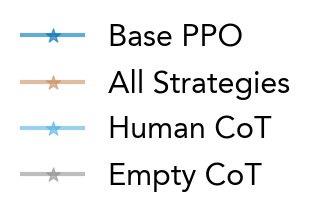

In [47]:
# Create a new figure for just the legend
fig_legend = plt.figure(figsize=(3, 3))  # Adjusted size for vertical stacking

# Create dummy lines with labels
lines = []
labels = {
    'base_ppo': 'Base PPO',
    'all_strategies': 'All Strategies',
    'human_cot': 'Human CoT',
    'empty_cot': 'Empty CoT',
}

for label in labels:
    line = plt.Line2D([0], [0], 
                      color=all_sft_color_bindings[label],
                      marker=llama_marker,
                      markersize=10,
                      label=label,
                      linestyle='-',
                      markeredgewidth=1,
                      markerfacecolor=all_sft_color_bindings[label], linewidth=3, alpha=0.6)
    lines.append(line)

# Create the legend
fig_legend.legend(lines, labels.values(), 
                 loc='center', 
                 ncol=1,           # Changed to 1 column for vertical stacking
                 frameon=False,
                 borderaxespad=0,  # Reduce padding
                 handlelength=2)   # Remove the connecting lines

# Remove axes
plt.gca().set_visible(False)

plt.show()

# Accuracy Length Correlation

In [48]:
import json
from behavioral_evals.acc_resp import compute_metrics
from transformers import AutoTokenizer
from scipy.stats import pearsonr

/scr/akchak/conda/envs/zero/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:
# get for qwen
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2.5-3B")
qwen_base_completions = json.load(open('/scr/akchak/rl_behaviors/outputs/base_ppo/completions_step0.jsonl', 'r'))
qwen_scores, qwen_lengths = compute_metrics(qwen_base_completions, tokenizer)

print("step 0")
# pearson correlation
corr_coeff, p_value = pearsonr(qwen_scores, qwen_lengths)
print(f"Pearson correlation coefficient: {corr_coeff:.3f} (p-value: {p_value:.3f})")

# spearman correlation
corr_coeff, p_value = pearsonr(qwen_scores, qwen_lengths)
print(f"Spearman correlation coefficient: {corr_coeff:.3f} (p-value: {p_value:.3f})")


print("step 240")
qwen_base_completions = json.load(open('/scr/akchak/rl_behaviors/outputs/base_ppo/completions_step240.jsonl', 'r'))
qwen_scores, qwen_lengths = compute_metrics(qwen_base_completions, tokenizer)

# pearson correlation
corr_coeff, p_value = pearsonr(qwen_scores, qwen_lengths)
print(f"Pearson correlation coefficient: {corr_coeff:.3f} (p-value: {p_value:.3f})")

# spearman correlation
corr_coeff, p_value = pearsonr(qwen_scores, qwen_lengths)
print(f"Spearman correlation coefficient: {corr_coeff:.3f} (p-value: {p_value:.3f})")

step 0
Pearson correlation coefficient: -0.060 (p-value: 0.054)
Spearman correlation coefficient: -0.060 (p-value: 0.054)
step 240
Pearson correlation coefficient: -0.864 (p-value: 0.000)
Spearman correlation coefficient: -0.864 (p-value: 0.000)


In [50]:
# get for llama
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.2-3B")
llama_base_completions = json.load(open('/scr/akchak/rl_behaviors/outputs/llama_base_ppo/completions_step0.jsonl', 'r'))
llama_scores, llama_lengths = compute_metrics(llama_base_completions, tokenizer)

print("step 0")
# pearson correlation
corr_coeff, p_value = pearsonr(llama_scores, llama_lengths)
print(f"Pearson correlation coefficient: {corr_coeff:.3f} (p-value: {p_value:.3f})")

# spearman correlation
corr_coeff, p_value = pearsonr(llama_scores, llama_lengths)
print(f"Spearman correlation coefficient: {corr_coeff:.3f} (p-value: {p_value:.3f})")

print("step 250")
llama_base_completions = json.load(open('/scr/akchak/rl_behaviors/outputs/llama_base_ppo/completions_step250.jsonl', 'r'))
llama_scores, llama_lengths = compute_metrics(llama_base_completions, tokenizer)

# pearson correlation
corr_coeff, p_value = pearsonr(llama_scores, llama_lengths)
print(f"Pearson correlation coefficient: {corr_coeff:.3f} (p-value: {p_value:.3f})")

# spearman correlation
corr_coeff, p_value = pearsonr(llama_scores, llama_lengths)
print(f"Spearman correlation coefficient: {corr_coeff:.3f} (p-value: {p_value:.3f})")

step 0
Pearson correlation coefficient: nan (p-value: nan)
Spearman correlation coefficient: nan (p-value: nan)
step 250
Pearson correlation coefficient: -0.060 (p-value: 0.056)
Spearman correlation coefficient: -0.060 (p-value: 0.056)


/tmp/user/23019/ipykernel_1116728/1006150401.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coeff, p_value = pearsonr(llama_scores, llama_lengths)
/tmp/user/23019/ipykernel_1116728/1006150401.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coeff, p_value = pearsonr(llama_scores, llama_lengths)


# OWMath pretrained

In [98]:
conditions = ['llama_owmathqa2_ppo', 'llama_owmathqa_none_ppo1', 'qwen_base_ppo', 'llama_base_ppo']
pastel = sns.color_palette("pastel")
all_sft_color_bindings['owmathqa2_ppo'] = pastel[3]
all_sft_color_bindings['owmathqa_none_ppo1'] = pastel[5]

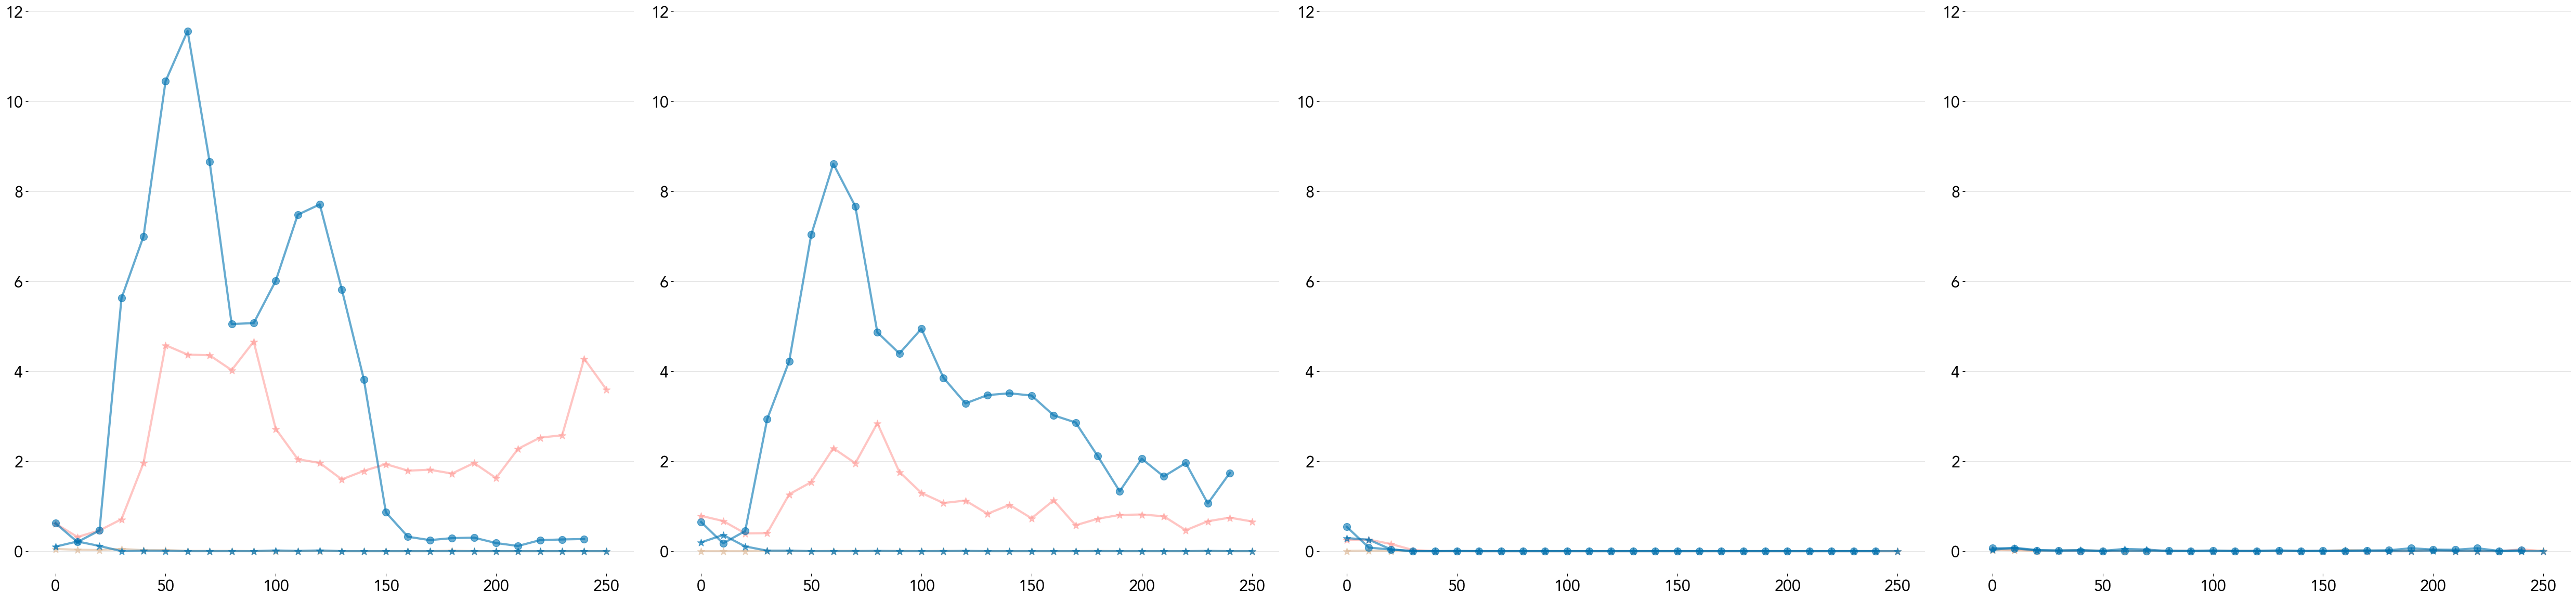

In [108]:
fig, axs = plt.subplots(1, 4, figsize=(50, 12))
for condition in conditions:
    marker = llama_marker if 'llama' in condition else qwen_marker
    if 'llama' in condition:
        condition = '_'.join(condition.split('_')[1:])
        data = df_llama[df_llama['condition'] == condition]
    elif 'qwen' in condition:
        condition = '_'.join(condition.split('_')[1:])
        data = df_qwen[df_qwen['condition'] == condition]

    for idx, phenomenon in enumerate(phenomena):
        ax = axs[idx]
        ax.spines["left"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.yaxis.grid(False) 
        # if phenomenon in ['avg_verifications', 'avg_backtracking']:
        #     ax.set_ylim(-.5, 12)
        # else:
        #     ax.set_ylim(-.001, 1)
        ax.set_ylim(-.5, 12)
        ax.grid(axis='y', color='gray', alpha=0.2, linestyle='-')

        ax.plot(
            data["step"],
            data[phenomenon],
            marker=marker,
            markersize=10,
            label=f"{condition}",
            color=all_sft_color_bindings[condition],
            alpha=0.6,
            linewidth=3,
        )

plt.tight_layout()
plt.show()
    
    

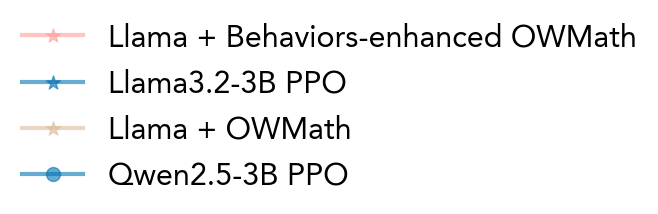

In [100]:
# TODO: FIX THIS!
fig_legend = plt.figure(figsize=(3, 3))  # Adjusted size for vertical stacking

# Create dummy lines with labels
lines = []

labels = {
    'llama_owmathqa2_ppo': 'Llama + Behaviors-enhanced OWMath',
    'llama_base_ppo': 'Llama3.2-3B PPO',
    'llama_owmathqa_none_ppo1': 'Llama + OWMath',
    'qwen_base_ppo': 'Qwen2.5-3B PPO',
}

for condition, label in labels.items():
    marker = llama_marker if 'llama' in condition else qwen_marker
    color_condition = '_'.join(condition.split('_')[1:])
    line = plt.Line2D([0], [0], 
                      color=all_sft_color_bindings[color_condition],
                      marker=marker,
                      markersize=10,
                      label=label,
                      linestyle='-',
                      markeredgewidth=1,
                      markerfacecolor=all_sft_color_bindings[color_condition], alpha=0.6, linewidth=3)
    lines.append(line)

# Create the legend
fig_legend.legend(lines, labels.values(), 
                 loc='center', 
                 ncol=1,           # Changed to 1 column for vertical stacking
                 frameon=False,
                 borderaxespad=0,  # Reduce padding
                 handlelength=2)   # Remove the connecting lines

# Remove axes
plt.gca().set_visible(False)

plt.tight_layout()
plt.show()

In [101]:
color_map = {
    'llama_owmathqa2_ppo': pastel[7],
    'llama_base_ppo': deep[4],
    'llama_owmathqa_none_ppo1': pastel[4],
    'qwen_base_ppo': deep[4],
}

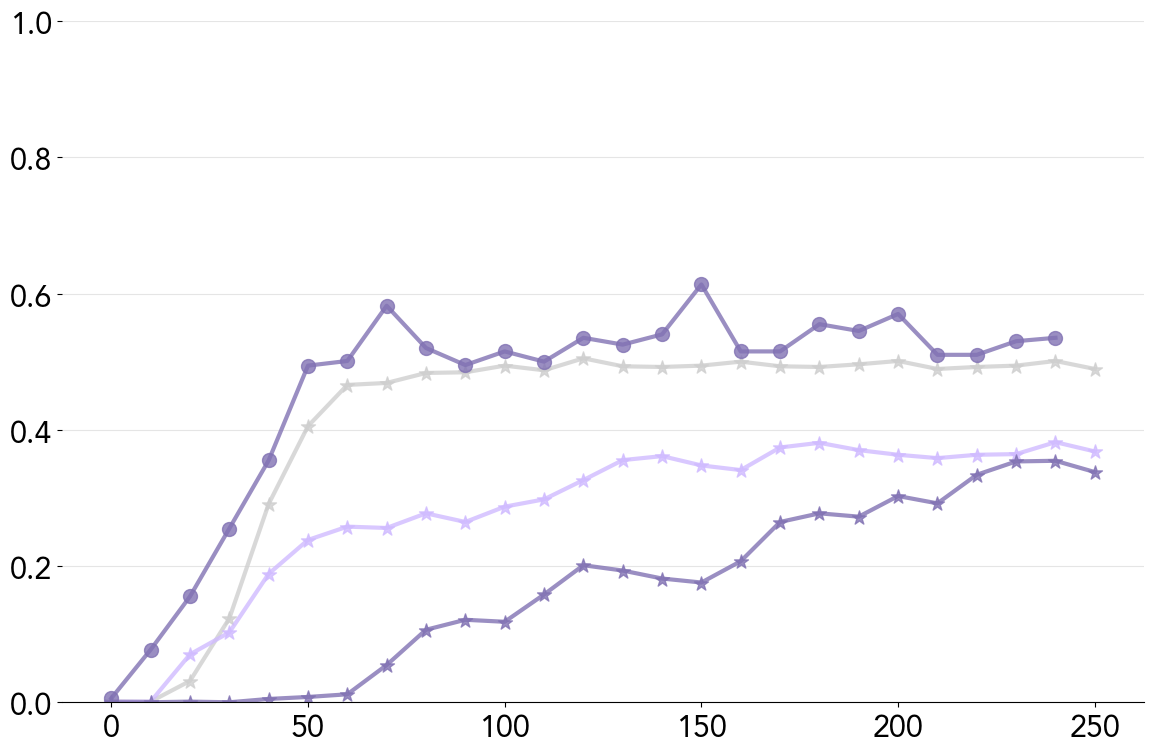

In [102]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.grid(False) 
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')
ax.set_ylim(0, 1)


statistics = ["accuracy"]
statistics_to_label = {"accuracy": "Accuracy"}

for condition in conditions:
    marker = llama_marker if 'llama' in condition else qwen_marker
    model_str = 'Qwen' if 'qwen' in condition else 'Llama'
    color_condition = condition
    if 'llama' in condition:
        condition = '_'.join(condition.split('_')[1:])
        data = df_llama[df_llama['condition'] == condition]
    elif 'qwen' in condition:
        condition = '_'.join(condition.split('_')[1:])
        data = df_qwen[df_qwen['condition'] == condition]
    

    for i, phenomenon in enumerate(statistics):
        ax.plot(
            data["step"],
            data[phenomenon],
            marker=marker,
            markersize=10,
            label=f"{model_str} {condition} {statistics_to_label[phenomenon]}",
            color=color_map[color_condition],
            alpha=0.8,
            linewidth=3,
        )

# ax.legend(frameon=False)
plt.tight_layout()
plt.show()

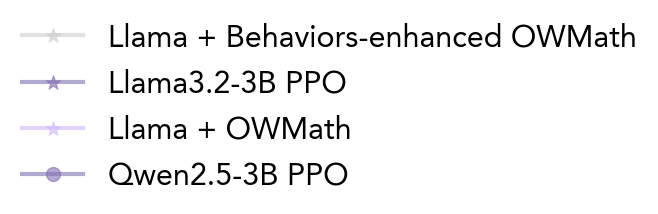

In [103]:
# TODO: FIX THIS!
fig_legend = plt.figure(figsize=(3, 3))  # Adjusted size for vertical stacking

# Create dummy lines with labels
lines = []

labels = {
    'llama_owmathqa2_ppo': 'Llama + Behaviors-enhanced OWMath',
    'llama_base_ppo': 'Llama3.2-3B PPO',
    'llama_owmathqa_none_ppo1': 'Llama + OWMath',
    'qwen_base_ppo': 'Qwen2.5-3B PPO',
}


for condition, label in labels.items():
    marker = llama_marker if 'llama' in condition else qwen_marker
    color_condition = '_'.join(condition.split('_')[1:])
    line = plt.Line2D([0], [0], 
                      color=color_map[condition],
                      marker=marker,
                      markersize=10,
                      label=label,
                      linestyle='-',
                      markeredgewidth=1,
                      markerfacecolor=color_map[condition],
                      alpha=0.6, linewidth=3)
    lines.append(line)

# Create the legend
fig_legend.legend(lines, labels.values(), 
                 loc='center', 
                 ncol=1,           # Changed to 1 column for vertical stacking
                 frameon=False,
                 borderaxespad=0,  # Reduce padding
                 handlelength=2)   # Remove the connecting lines

# Remove axes
plt.gca().set_visible(False)

plt.tight_layout()
plt.show()

In [104]:
color_map = {
    'llama_owmathqa2_ppo': pastel[9],
    'llama_base_ppo': deep[5],
    'llama_owmathqa_none_ppo1': pastel[5],
    'qwen_base_ppo': deep[5],
}

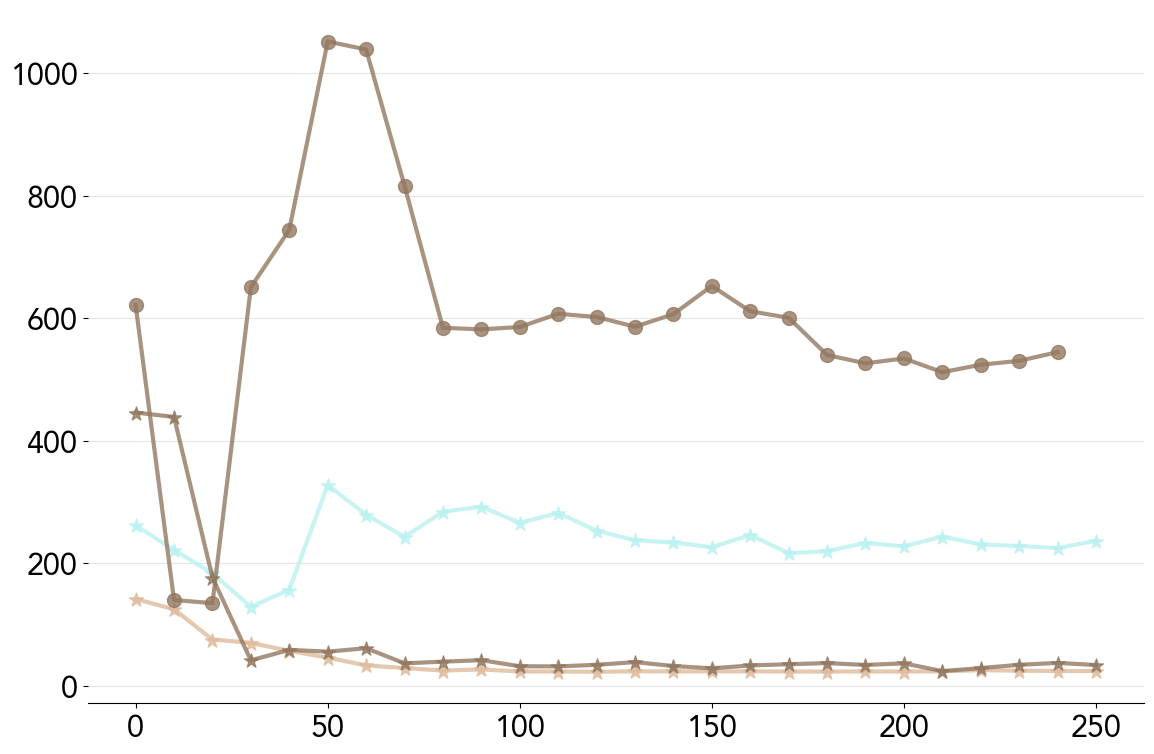

In [105]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.grid(False) 
plt.grid(axis='y', color='gray', alpha=0.2, linestyle='-')


statistics = ["response_length"]
statistics_to_label = {"response_length": "Response Length"}

for condition in conditions:
    color_condition = condition
    marker = llama_marker if 'llama' in condition else qwen_marker
    model_str = 'Qwen' if 'qwen' in condition else 'Llama'
    if 'llama' in condition:
        condition = '_'.join(condition.split('_')[1:])
        data = df_llama[df_llama['condition'] == condition]
    elif 'qwen' in condition:
        condition = '_'.join(condition.split('_')[1:])
        data = df_qwen[df_qwen['condition'] == condition]

    for i, phenomenon in enumerate(statistics):
        ax.plot(
            data["step"],
            data[phenomenon],
            marker=marker,
            markersize=10,
            label=f"{model_str} {condition} {statistics_to_label[phenomenon]}",
            color=color_map[color_condition],
            alpha=0.8,
            linewidth=3,
        )

# ax.legend(frameon=False)
plt.tight_layout()
plt.show()

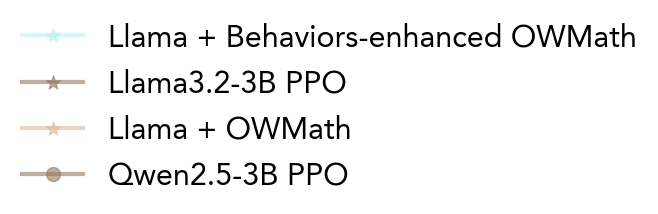

In [293]:
# TODO: FIX THIS!
fig_legend = plt.figure(figsize=(3, 3))  # Adjusted size for vertical stacking

# Create dummy lines with labels
lines = []

labels = {
    'llama_owmathqa2_ppo': 'Llama + Behaviors-enhanced OWMath',
    'llama_base_ppo': 'Llama3.2-3B PPO',
    'llama_owmathqa_none_ppo1': 'Llama + OWMath',
    'qwen_base_ppo': 'Qwen2.5-3B PPO',
}


for condition, label in labels.items():
    marker = llama_marker if 'llama' in condition else qwen_marker
    color_condition = '_'.join(condition.split('_')[1:])
    line = plt.Line2D([0], [0], 
                      color=color_map[condition],
                      marker=marker,
                      markersize=10,
                      label=label,
                      linestyle='-',
                      markeredgewidth=1,
                      markerfacecolor=color_map[condition],
                      alpha=0.6, linewidth=3)
    lines.append(line)

# Create the legend
fig_legend.legend(lines, labels.values(), 
                 loc='center', 
                 ncol=1,           # Changed to 1 column for vertical stacking
                 frameon=False,
                 borderaxespad=0,  # Reduce padding
                 handlelength=2)   # Remove the connecting lines

# Remove axes
plt.gca().set_visible(False)

plt.tight_layout()
plt.show()